In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# Principle of work

Principle of analysis is similar to the case of classic pools, check there for more info

### Setting simulation instances that contain all required info

In [2]:
# NFT token pools or NFT-related token pools
axs_weth_sim = Simulation(experiment_id = 11, x_name = 'AXS', y_name = 'WETH', window_size = 24,
                          base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mana_weth_sim = Simulation(experiment_id = 12, x_name = 'MANA', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
enj_weth_sim = Simulation(experiment_id = 13, x_name = 'ENJ', y_name = 'WETH', window_size = 24,
                          base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_", x_index = '1', y_index = '0')
sand_weth_sim = Simulation(experiment_id = 14, x_name = 'SAND', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
alice_weth_sim = Simulation(experiment_id = 15, x_name = 'ALICE', y_name = 'WETH', window_size = 24,
                            base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

### Getting original swaps dataframes

In [3]:
axs_weth_swaps_df = axs_weth_sim.get_original_swaps_df()
mana_weth_swaps_df = mana_weth_sim.get_original_swaps_df()
enj_weth_swaps_df = enj_weth_sim.get_original_swaps_df()
sand_weth_swaps_df = sand_weth_sim.get_original_swaps_df()
alice_weth_swaps_df = alice_weth_sim.get_original_swaps_df()

### Setting concatenation between original swaps dataframe and gas-related info

In [4]:
nft_pools_list = [axs_weth_swaps_df, mana_weth_swaps_df, enj_weth_swaps_df,
                  sand_weth_swaps_df, alice_weth_swaps_df]

nft_pools_swaps_df = pd.concat(nft_pools_list)
with open('nft_pools_mevs', 'rb') as f: mevs_transactions_list = pickle.load(f)

mevs_df = pd.read_pickle('nft_pools_mevs_with_gas_df.pkl')
mevs_df['txd'] = mevs_transactions_list
mevs_df

txd     block  \
0     0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...  12358321   
1     0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...  12358321   
2     0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...  12358324   
3     0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...  12358324   
4     0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...  12358334   
...                                                 ...       ...   
3287  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  13669667   
3288  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  13677996   
3289  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  13677996   
3290  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  13681482   
3291  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  13681482   

     block_position gas_usage_by_tx ether_price                tx_fee  
0                 6          76,180    3,432.21           0.000000001  
1                 3         116,312    3,432.21           0.000000001  
2                45         127,234    3,432.21  0.000000040000000059  
3                47          78,879    3,432.21            0.00000004  
4                29          78,879    3,432.21           0.000000033  
...             ...             ...         ...                   ...  
3287              6          85,522    4,341.17   0.00000009543208042  
3288              2          86,311    4,271.96  0.000000139672898872  
3289              4          85,522    4,271.96  0.000000139672898872  
3290              5          86,131    4,523.80  0.000000113821521649  
3291              7          85,542    4,523.80  0.000000113821521649  

[3292 rows x 6 columns]

In [5]:
mevs_df = pd.merge(mevs_df, nft_pools_swaps_df, on='txd', how='left')

There is a bug present due to the etherscan data extraction and it is required to remove additional symbols

In [6]:
mevs_df['block'] = pd.to_numeric(mevs_df['block'])
mevs_df['block_position'] = pd.to_numeric(mevs_df['block_position'])
mevs_df['gas_usage_by_tx'] = pd.to_numeric(mevs_df['gas_usage_by_tx'].str.replace(',', ''))
mevs_df['ether_price'] = mevs_df['ether_price'].str.replace('$', '')
mevs_df['ether_price'] = pd.to_numeric(mevs_df['ether_price'].str.replace(',', ''))
mevs_df['tx_fee'] = pd.to_numeric(mevs_df['tx_fee'].str.replace('wei', ''))
mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292 entries, 0 to 3291
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              3292 non-null   object        
 1   block            3292 non-null   int64         
 2   block_position   3292 non-null   int64         
 3   gas_usage_by_tx  3292 non-null   int64         
 4   ether_price      3292 non-null   float64       
 5   tx_fee           3292 non-null   float64       
 6   token_in         3292 non-null   object        
 7   token_out        3292 non-null   object        
 8   amount_in        3292 non-null   float64       
 9   amount_out       3292 non-null   float64       
 10  amount_usd       3292 non-null   float64       
 11  timestamp        3292 non-null   datetime64[ns]
 12  sender           3292 non-null   object        
 13  to               3292 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(

<ipython-input-6-529235478d35>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mevs_df['ether_price'] = mevs_df['ether_price'].str.replace('$', '')


In [7]:
pca = PCA(n_components=1)
mevs_df['pca_tx_values'] = pca.fit_transform(mevs_df[['amount_in', 'amount_out']])

pca = PCA(n_components=3)
mevs_df[['pca_1', 'pca_2', 'pca_3']] = pca.fit_transform(
    mevs_df[['block', 'block_position', 'gas_usage_by_tx', 'ether_price',
            'tx_fee', 'amount_in', 'amount_out', 'amount_usd']]
)

### Correlation between features

Correlation between block number and Ether price is extremely high. There is a medium level correlation between gas price and ```amount_in``` value of transaction. ```tx_fee``` has a medium level correlation with ```amount_in``` and ```ether_price```. Those correlation are stronger compared to the case of classic tokens.

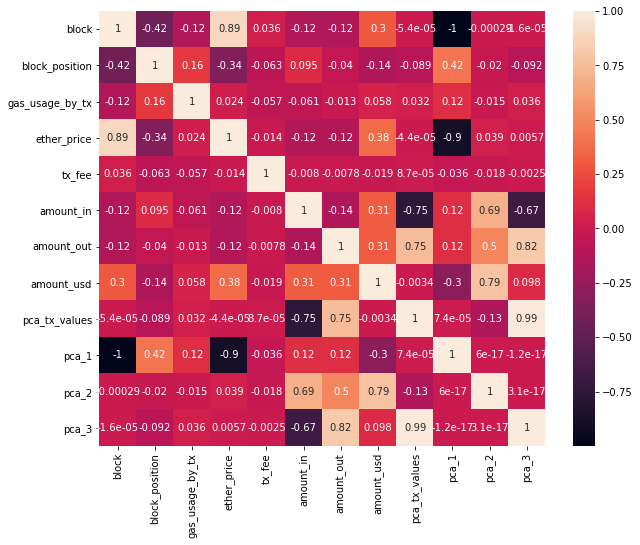

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(mevs_df.corr(), annot=True)
plt.show()

### Setting scatters of features

There is a problem with dataset of ```tx_fee``` values equal to 1 (possible source error) and therefore records with value around 1 were ignored.

There is almost no connection present between tx fee and gas usage. Can be seen that most of the records are concentrated around small values with some extreme outliers. Therefore it was decided to check connection with ether price (even considering that correlation presented in the heatmap is small).

Connection is weak and there is no observable pattern between Ether price and value with fee of the transaction.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


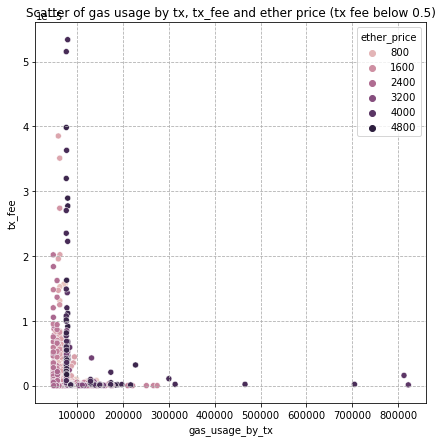

In [9]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'],
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'],
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5)')
plt.show()

Most of the records are placed in the lowest left section, meaning that most of transactions are keeping a small level of gas consumption, but the most interesting moment is that all those low-value cases conform hue are having smallest ```gas_price``` values, meaning that most of the attacks are performed during low gas price. Therefore, low gas price will not cause higher transaction values (there is no strong correlation) but causes bigger MEV activity. This is similar to the case of reviewed classic tokens and reviewed NFT tokens.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


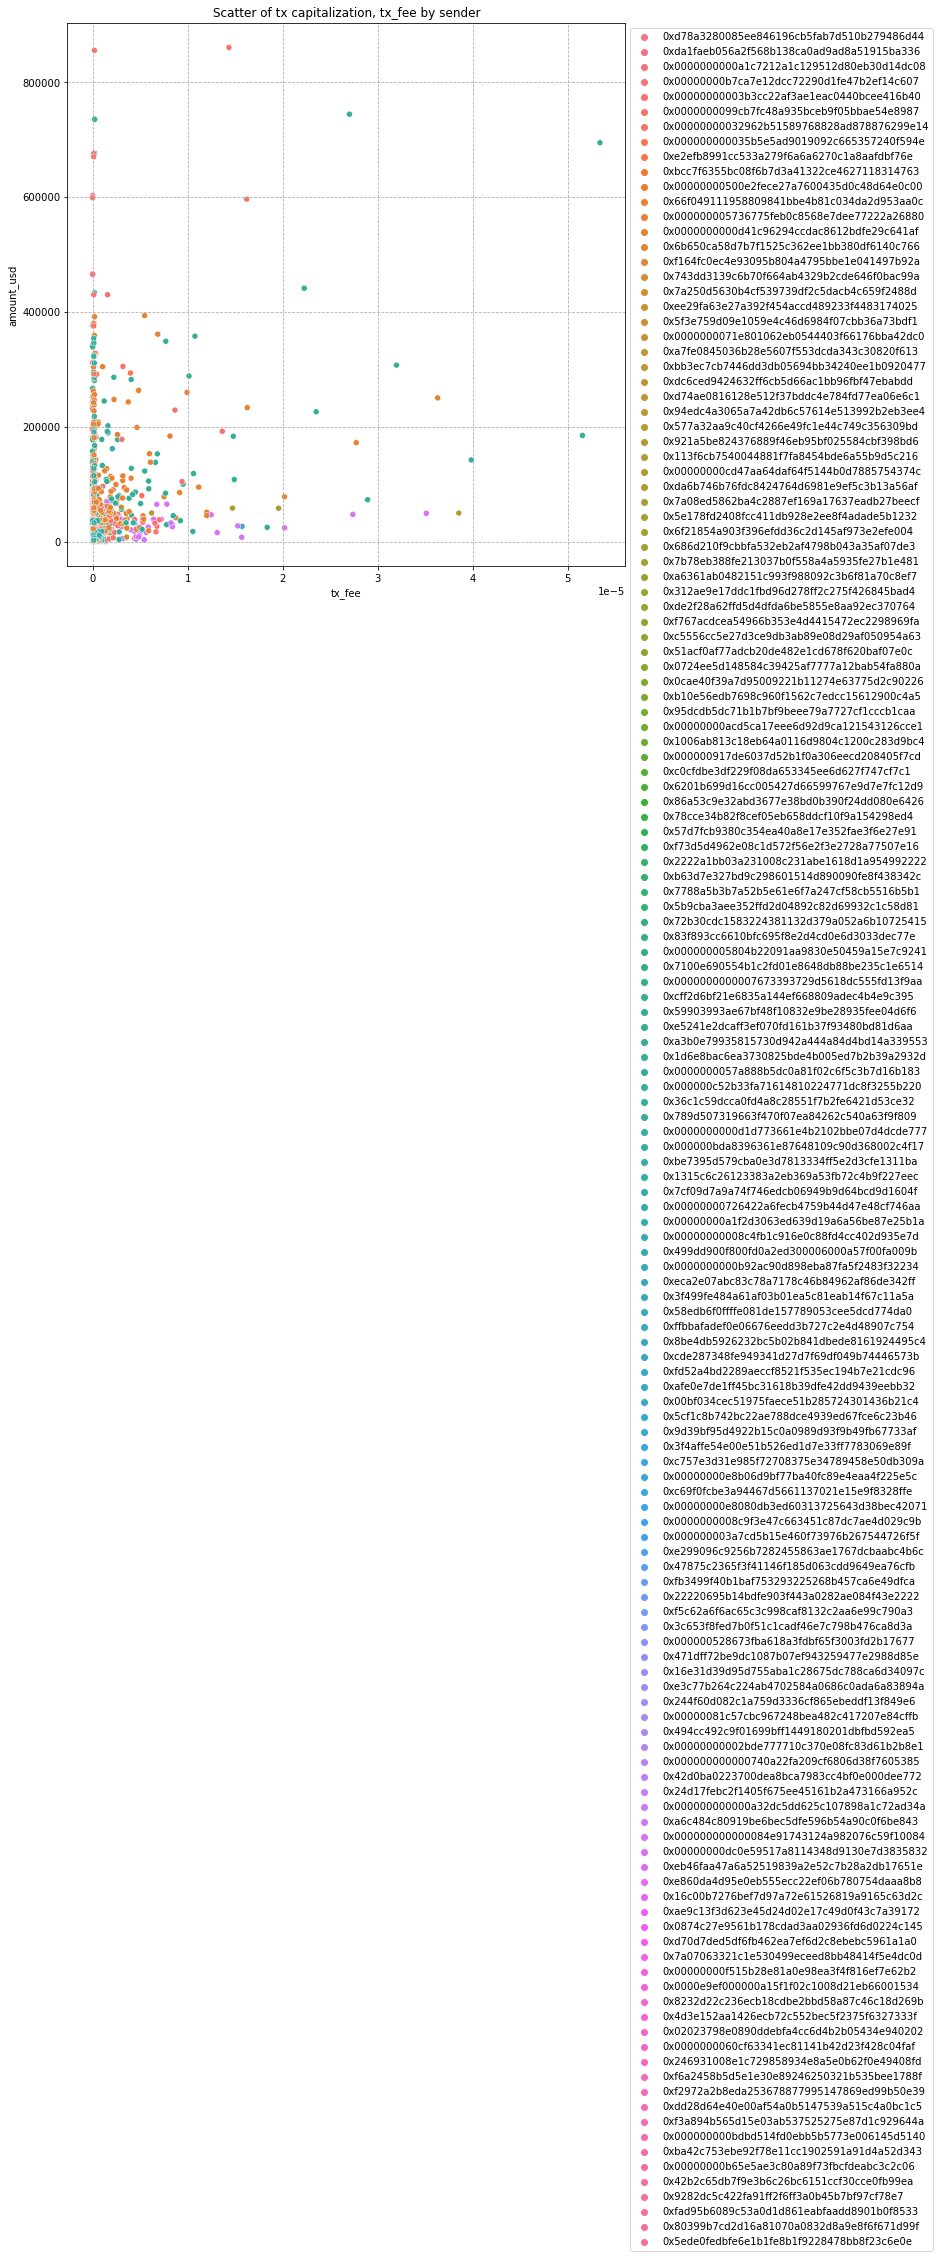

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'],
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'],
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of tx capitalization, tx_fee by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

Only in unique cases attackers are willing to perform transaction with high gas usage and high transaction fees, demonstrating desire for most of the attackers to minimize their losses

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


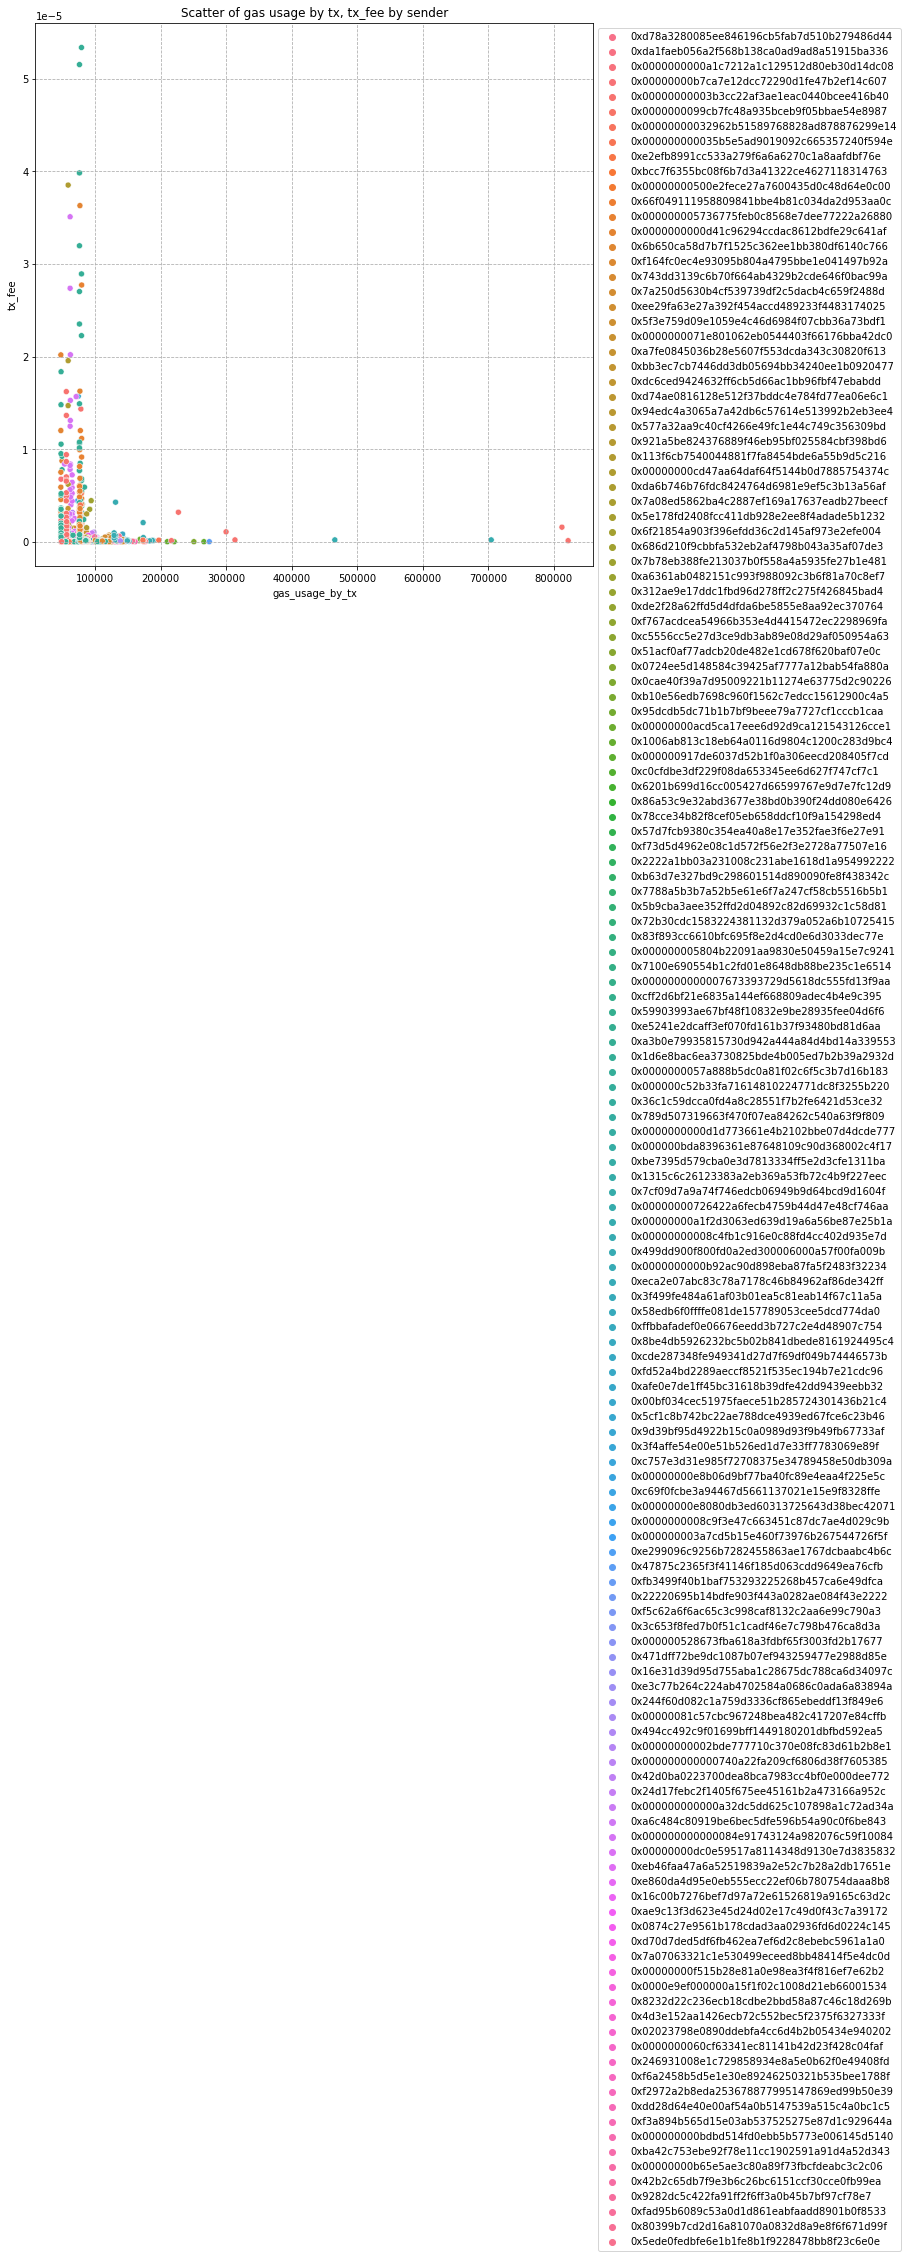

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'],
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'],
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

In [12]:
mevs_df.sort_values(by=['block'], inplace=True)

Conform charts can be seen two interesting moments:

* Tx fee becomes higher with decrease of used gas. This is possible due to rise of gas price during decrease of gas usage (it correlates with gas price decrease).
* MEV transactions capitalization increases during decrease of the gas price, meaning that attackers try to perform attacks with higher capitalization in case of decrease in gas price

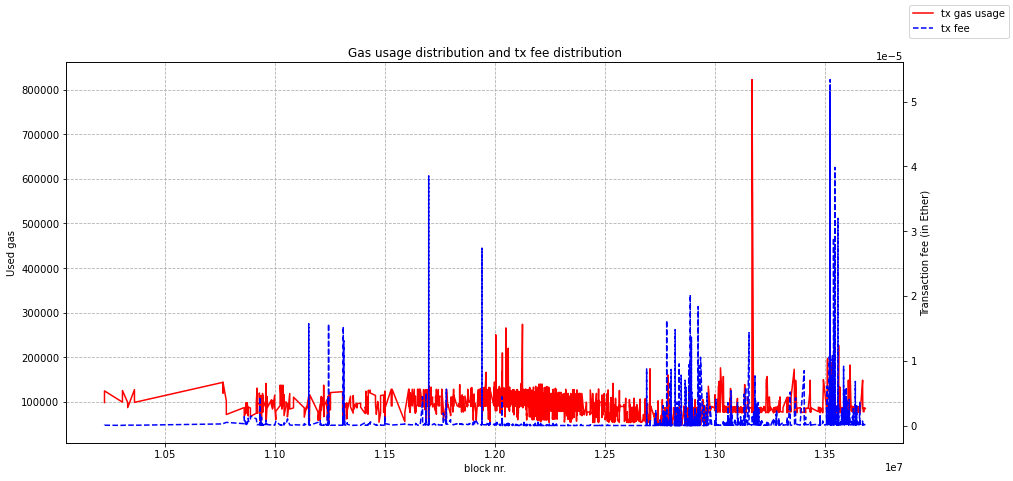

In [13]:
# gas usage and tx fee
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()
ax.plot(mevs_df[mevs_df['tx_fee'] < 1]['block'],
        mevs_df[mevs_df['tx_fee'] < 1]['gas_usage_by_tx'],
        color='r', label='tx gas usage')
ax2.plot(mevs_df[mevs_df['tx_fee'] < 1]['block'],
         mevs_df[mevs_df['tx_fee'] < 1]['tx_fee'],
         color='b', linestyle='--', label='tx fee')
ax.set_title('Gas usage distribution and tx fee distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Used gas')
ax2.set_ylabel('Transaction fee (in Ether)')
ax.grid(True, linestyle='--')
fig.legend()
plt.show()

In most of the cases, MEV transactions are the first and the third ones (which corresponds to the basic attack pattern), but there are some specific cases of attacks happening little later (till position 9). All values above 10-th position are more likely to be outliers. Those assumptions are made based on the principle of MEV attack, which tries to perform transactions while being the first one in the block.

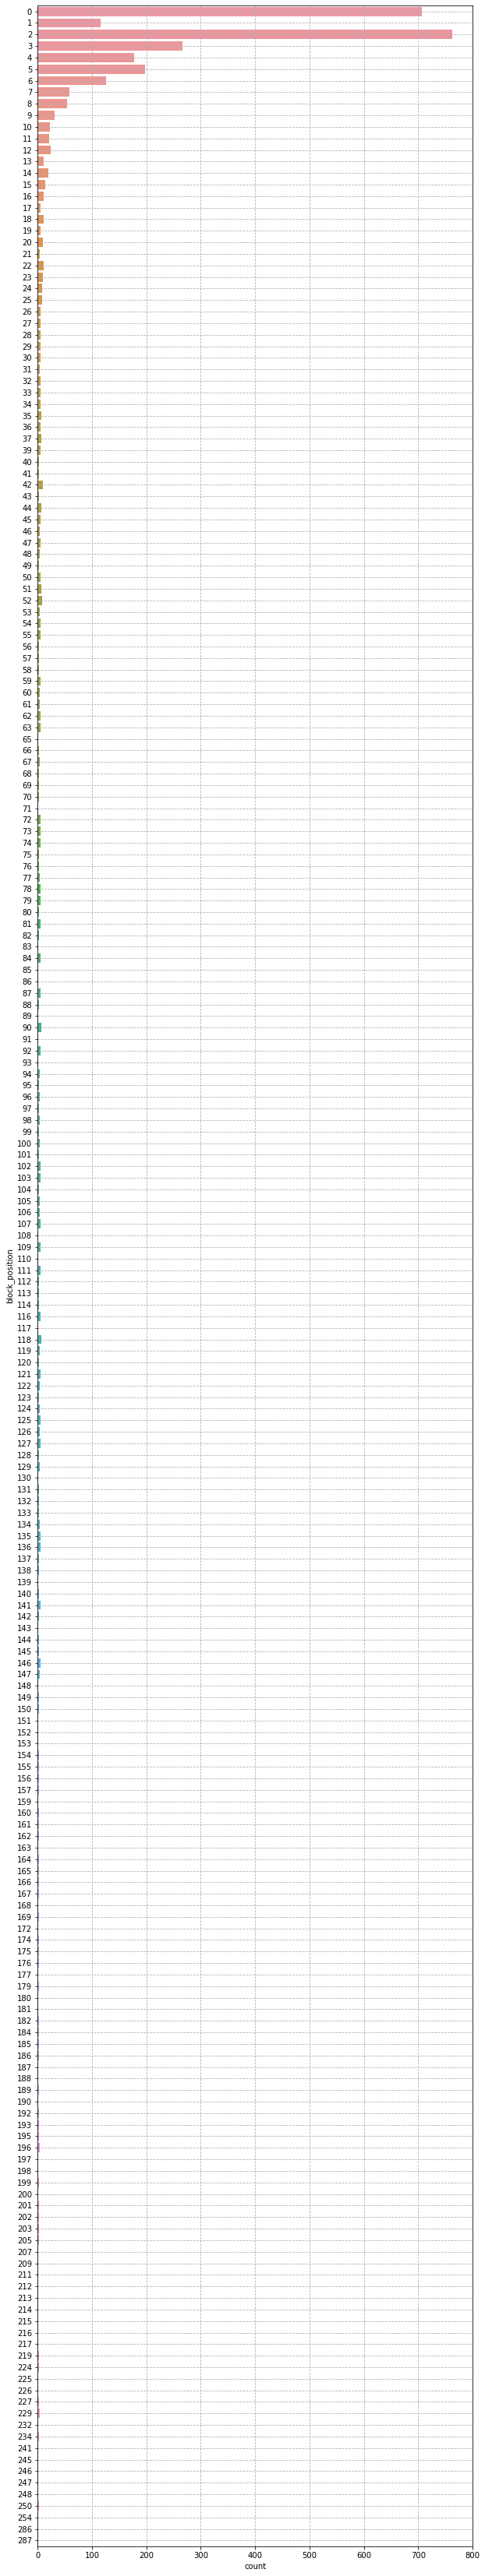

In [14]:
plt.figure(figsize=(10, 60))
sns.countplot(y='block_position', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

There are transactions with extremely small capitalizations, reducing their likelihood of being MEV attacks and it is possible that in current case additional MEV values check is required to be performed.

In [15]:
print(fr'max capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].max()}')
print(fr'min capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].min()}')
print(fr'mean capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].mean()}')
print(fr'median capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].median()}')

max capitalization registered after 9-th position in the block = 311398.2856771295
min capitalization registered after 9-th position in the block = 89.40625175485464
mean capitalization registered after 9-th position in the block = 16109.09847852239
median capitalization registered after 9-th position in the block = 8528.371660022824


In [16]:
print(fr"there are {len(mevs_df[mevs_df['block_position'] > 9])} transactions with position after 9-th position in the block")
print(fr"out of those transactions there are {len(mevs_df[(mevs_df['block_position'] > 9) & (mevs_df['amount_usd'] < 300)])} with capitalization smaller than 300 USD and {len(mevs_df[(mevs_df['block_position'] > 9) & (mevs_df['amount_usd'] < 3000)])} with capitalization smaller than 3000 USD")

there are 798 transactions with position after 9-th position in the block
out of those transactions there are 9 with capitalization smaller than 300 USD and 169 with capitalization smaller than 3000 USD


There are 4 addresses with extremely high count of MEV attacks. They are representing one of the biggest attackers that were detected during work over all of the reviewed pools

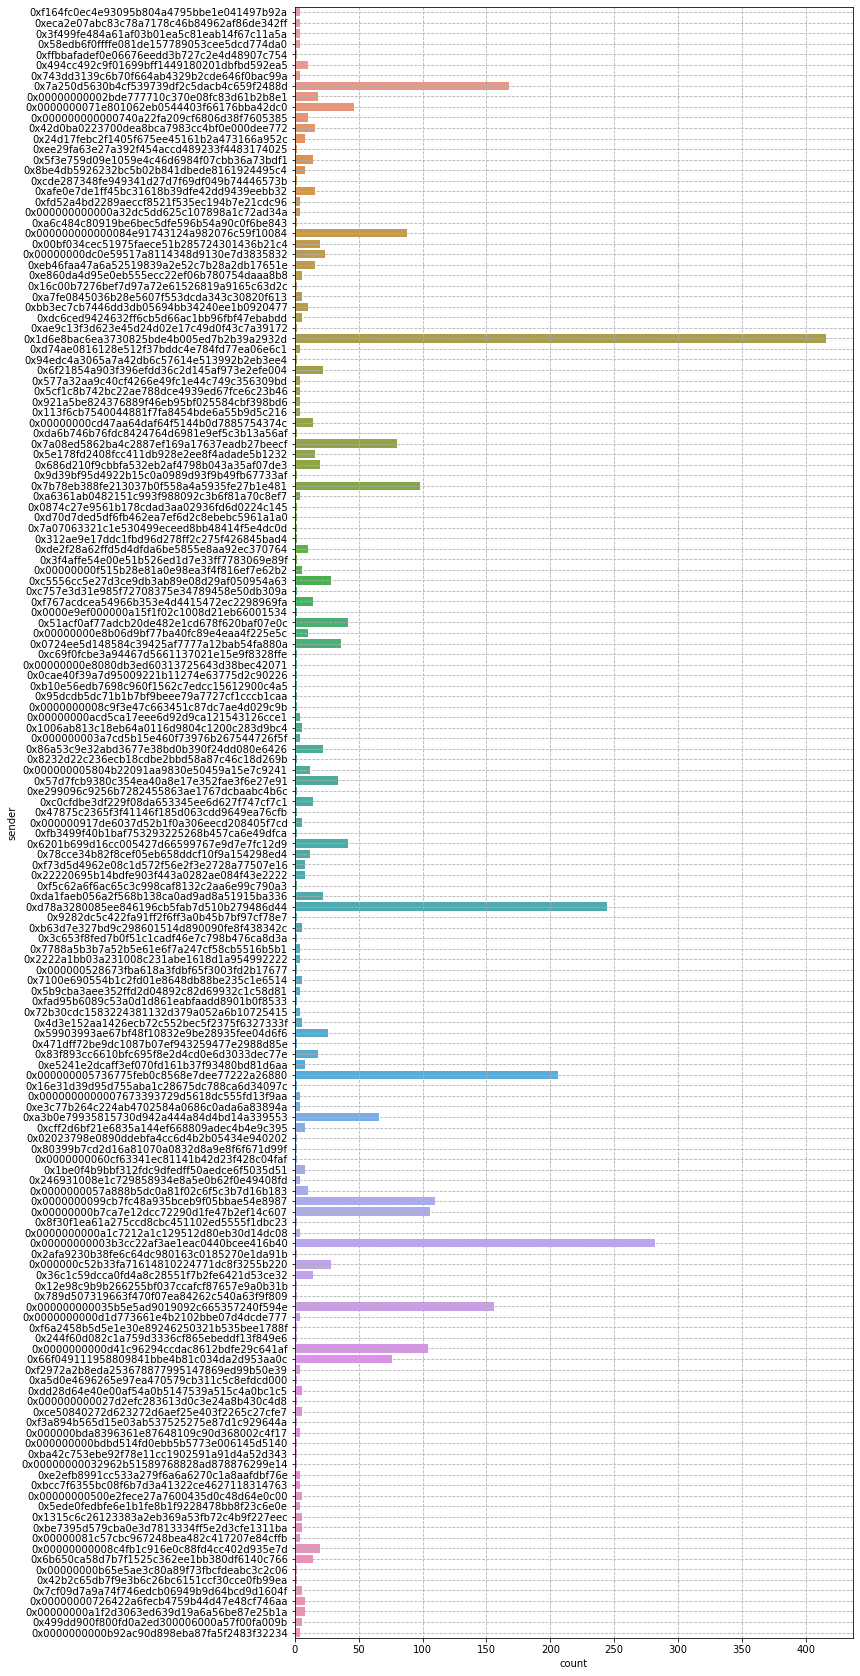

In [17]:
fig = plt.figure(figsize=(10, 30))
sns.countplot(y='sender', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

# Separate analysis of all pools

Construction of the WETH/USDC price table for performing efficient capitalization and profit analysis (required considering that all pools from meme tokens are in pair with WETH

In [18]:
weth_usdc_sim = Simulation(experiment_id = 2, x_name = 'WETH', y_name = 'USDC', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_",
                           x_index='1', y_index='0')
weth_price_df = weth_usdc_sim.get_daily_token_price(True, 'WETH')
weth_price_df['date'] = weth_price_df['date'].dt.strftime("%Y-%m-%d")

In [19]:
nft_pools_mevs_df = pd.read_pickle('nft_pools_mevs_with_gas_df.pkl')
nft_pools_mevs_df

txd     block  \
0     0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...  12358321   
1     0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...  12358321   
2     0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...  12358324   
3     0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...  12358324   
4     0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...  12358334   
...                                                 ...       ...   
3287  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  13669667   
3288  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  13677996   
3289  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  13677996   
3290  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  13681482   
3291  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  13681482   

     block_position gas_usage_by_tx ether_price                tx_fee  
0                 6          76,180    3,432.21           0.000000001  
1                 3         116,312    3,432.21           0.000000001  
2                45         127,234    3,432.21  0.000000040000000059  
3                47          78,879    3,432.21            0.00000004  
4                29          78,879    3,432.21           0.000000033  
...             ...             ...         ...                   ...  
3287              6          85,522    4,341.17   0.00000009543208042  
3288              2          86,311    4,271.96  0.000000139672898872  
3289              4          85,522    4,271.96  0.000000139672898872  
3290              5          86,131    4,523.80  0.000000113821521649  
3291              7          85,542    4,523.80  0.000000113821521649  

[3292 rows x 6 columns]

In [20]:
nft_pools_mevs_df['block'] = pd.to_numeric(nft_pools_mevs_df['block'])
nft_pools_mevs_df['block_position'] = pd.to_numeric(nft_pools_mevs_df['block_position'])
nft_pools_mevs_df['gas_usage_by_tx'] = pd.to_numeric(nft_pools_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
nft_pools_mevs_df['ether_price'] = nft_pools_mevs_df['ether_price'].str.replace('$', '')
nft_pools_mevs_df['ether_price'] = pd.to_numeric(nft_pools_mevs_df['ether_price'].str.replace(',', ''))
nft_pools_mevs_df['tx_fee'] = pd.to_numeric(nft_pools_mevs_df['tx_fee'].str.replace('wei', ''))
nft_pools_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   txd              3292 non-null   object 
 1   block            3292 non-null   int64  
 2   block_position   3292 non-null   int64  
 3   gas_usage_by_tx  3292 non-null   int64  
 4   ether_price      3292 non-null   float64
 5   tx_fee           3292 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 154.4+ KB


<ipython-input-20-a778f7b9d4d6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nft_pools_mevs_df['ether_price'] = nft_pools_mevs_df['ether_price'].str.replace('$', '')


In [21]:
axs_weth_swaps_df = axs_weth_sim.get_original_swaps_df()
mana_weth_swaps_df = mana_weth_sim.get_original_swaps_df()
enj_weth_swaps_df = enj_weth_sim.get_original_swaps_df()
sand_weth_swaps_df = sand_weth_sim.get_original_swaps_df()
alice_weth_swaps_df = alice_weth_sim.get_original_swaps_df()

## AXS/WETH

In [22]:
axs_weth_filtered_swaps_df, axs_weth_mevs_df = axs_weth_sim.extract_filtered_and_mevs_dfs()
axs_weth_mevs_df

initial len = 4588, filtered len = 4538
txds = 50
out values = 25


token_in token_out    amount_in   amount_out     amount_usd  \
5         AXS      WETH  1453.949686   200.157590  312150.092977   
8        WETH       AXS   200.000000  1453.949686  602630.784000   
10       WETH       AXS     1.710000   315.441608    5784.433126   
11        AXS      WETH   315.441608     1.737494    4721.062730   
16        AXS      WETH   171.943376     0.805030    2301.348308   
17       WETH       AXS     0.750000   171.943376    2386.538581   
728       AXS      WETH    73.429311     0.173512     397.480250   
729      WETH       AXS     0.135561    73.429311     333.085712   
993       AXS      WETH   144.283160     0.369760     862.549895   
995      WETH       AXS     0.345196   144.283160     920.043644   
1117     WETH       AXS     0.060988    32.272748     163.878516   
1119      AXS      WETH    32.272748     0.065860     172.773521   
1208     WETH       AXS     0.089362    46.475190     234.351584   
1210      AXS      WETH    46.475190     0.096227     246.766772   
1447      AXS      WETH   232.870783     0.468462    1226.666551   
1448     WETH       AXS     0.447294   232.870783    1336.121905   
1456      AXS      WETH   125.162316     0.237626     643.803914   
1457     WETH       AXS     0.225842   125.162316     654.459029   
1873     WETH       AXS     0.223231    13.929999     495.922944   
1874      AXS      WETH    13.474938     0.223231     463.067984   
1935      AXS      WETH    20.417812     0.446719     917.013926   
1936     WETH       AXS     0.436913    20.417812    1010.722588   
2141     WETH       AXS     0.314162    13.399701     742.786012   
2143      AXS      WETH    13.399701     0.393862     847.221002   
2314      AXS      WETH    13.395282     0.284870     649.071438   
2315     WETH       AXS     0.260931    13.395282     662.961902   
2583      AXS      WETH    21.188883     0.283991     752.751727   
2584     WETH       AXS     0.283991    23.236322     861.641853   
2857     WETH       AXS     0.288958    11.709512     941.124993   
2858      AXS      WETH    11.709512     0.300924     895.520447   
2980      AXS      WETH    11.531744     0.298457     910.714030   
2981     WETH       AXS     0.272400    11.531744     879.533179   
3171      AXS      WETH     9.286010     0.238178     762.064868   
3173     WETH       AXS     0.220660     9.286010     738.238856   
3190      AXS      WETH    10.882943     0.283046     907.779982   
3191     WETH       AXS     0.278234    10.882943     941.890230   
3207     WETH       AXS     0.046957     2.167403     154.985848   
3208      AXS      WETH     1.985897     0.046957     153.876271   
3274      AXS      WETH     5.967361     0.154710     480.157793   
3275     WETH       AXS     0.146766     5.967361     467.548775   
3565     WETH       AXS     0.294733    12.238787    1192.357283   
3567      AXS      WETH    12.238787     0.322582    1189.608938   
3665      AXS      WETH    16.382816     0.435807    1420.885381   
3666     WETH       AXS     0.372664    16.382816    1337.472828   
3910     WETH       AXS     0.309851    11.161235     985.956549   
3911      AXS      WETH    11.161235     0.376435    1074.914319   
3978      AXS      WETH    47.774361     3.269284    8367.927839   
3979     WETH       AXS     3.034927    47.774361   15291.672969   
4327      AXS      WETH    18.790297     0.788116    2952.099487   
4329     WETH       AXS     0.742013    18.790297    3392.839473   

               timestamp                                      sender  \
5    2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
8    2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
10   2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
11   2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
16   2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
17   2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
728  2021-05-28 22:35:20  0x0000

In [23]:
axs_weth_mevs_df = axs_weth_sim.calculate_attack_profit(axs_weth_mevs_df)
axs_weth_mevs_df = axs_weth_sim.calculate_attack_profit_by_token(axs_weth_mevs_df)

In [24]:
axs_price_df = axs_weth_sim.get_daily_token_price(first_to_second=False, token_name='AXS')
axs_price_df['date'] = axs_price_df['date'].dt.strftime("%Y-%m-%d")
axs_price_df

date  AXS_price
0    2021-05-03   0.002948
1    2021-05-04   0.002419
2    2021-05-05   0.002548
3    2021-05-06   0.002134
4    2021-05-07   0.002408
..          ...        ...
184  2021-11-20   0.029520
185  2021-11-21   0.031058
186  2021-11-22   0.031829
187  2021-11-23   0.030013
188  2021-11-24   0.033605

[189 rows x 2 columns]

In [25]:
axs_weth_mevs_df['date'] = axs_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
axs_weth_mevs_df = pd.merge(axs_weth_mevs_df, axs_price_df, on='date', how='left')
axs_weth_mevs_df = pd.merge(axs_weth_mevs_df, weth_price_df, on='date', how='left')
axs_weth_mevs_df = pd.merge(axs_weth_mevs_df, nft_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [26]:
axs_weth_mevs_df['bruto_axs_to_usdc_profit'] = (axs_weth_mevs_df['AXS_profit'] * axs_weth_mevs_df['AXS_price'] *
                                                  axs_weth_mevs_df['WETH_price'])
axs_weth_mevs_df['bruto_total_profit'] = axs_weth_mevs_df['bruto_axs_to_usdc_profit'] + (axs_weth_mevs_df['WETH_profit'] *
                                                                                            axs_weth_mevs_df['WETH_price'])
axs_weth_mevs_df.loc[axs_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = axs_weth_mevs_df['tx_fee'].median()
axs_weth_mevs_df.loc[axs_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = axs_weth_mevs_df['tx_fee'].median()
axs_weth_mevs_df['gas_costs_usd'] = (axs_weth_mevs_df['tx_fee'] * axs_weth_mevs_df['WETH_price'] *
                                      axs_weth_mevs_df['gas_usage_by_tx'])
axs_weth_mevs_df['netto_profit'] = axs_weth_mevs_df['bruto_total_profit'] - axs_weth_mevs_df['gas_costs_usd']
axs_weth_mevs_df.dropna(inplace=True)
axs_weth_mevs_df

token_in token_out    amount_in   amount_out     amount_usd  \
0       AXS      WETH  1453.949686   200.157590  312150.092977   
1      WETH       AXS   200.000000  1453.949686  602630.784000   
2      WETH       AXS     1.710000   315.441608    5784.433126   
3       AXS      WETH   315.441608     1.737494    4721.062730   
4       AXS      WETH   171.943376     0.805030    2301.348308   
5      WETH       AXS     0.750000   171.943376    2386.538581   
6       AXS      WETH    73.429311     0.173512     397.480250   
7      WETH       AXS     0.135561    73.429311     333.085712   
8       AXS      WETH   144.283160     0.369760     862.549895   
9      WETH       AXS     0.345196   144.283160     920.043644   
10     WETH       AXS     0.060988    32.272748     163.878516   
11      AXS      WETH    32.272748     0.065860     172.773521   
12     WETH       AXS     0.089362    46.475190     234.351584   
13      AXS      WETH    46.475190     0.096227     246.766772   
14      AXS      WETH   232.870783     0.468462    1226.666551   
15     WETH       AXS     0.447294   232.870783    1336.121905   
16      AXS      WETH   125.162316     0.237626     643.803914   
17     WETH       AXS     0.225842   125.162316     654.459029   
18     WETH       AXS     0.223231    13.929999     495.922944   
19      AXS      WETH    13.474938     0.223231     463.067984   
20      AXS      WETH    20.417812     0.446719     917.013926   
21     WETH       AXS     0.436913    20.417812    1010.722588   
22     WETH       AXS     0.314162    13.399701     742.786012   
23      AXS      WETH    13.399701     0.393862     847.221002   
24      AXS      WETH    13.395282     0.284870     649.071438   
25     WETH       AXS     0.260931    13.395282     662.961902   
26      AXS      WETH    21.188883     0.283991     752.751727   
27     WETH       AXS     0.283991    23.236322     861.641853   
28     WETH       AXS     0.288958    11.709512     941.124993   
29      AXS      WETH    11.709512     0.300924     895.520447   
30      AXS      WETH    11.531744     0.298457     910.714030   
31     WETH       AXS     0.272400    11.531744     879.533179   
32      AXS      WETH     9.286010     0.238178     762.064868   
33     WETH       AXS     0.220660     9.286010     738.238856   
34      AXS      WETH    10.882943     0.283046     907.779982   
35     WETH       AXS     0.278234    10.882943     941.890230   
36     WETH       AXS     0.046957     2.167403     154.985848   
37      AXS      WETH     1.985897     0.046957     153.876271   
38      AXS      WETH     5.967361     0.154710     480.157793   
39     WETH       AXS     0.146766     5.967361     467.548775   
40     WETH       AXS     0.294733    12.238787    1192.357283   
41      AXS      WETH    12.238787     0.322582    1189.608938   
42      AXS      WETH    16.382816     0.435807    1420.885381   
43     WETH       AXS     0.372664    16.382816    1337.472828   
44     WETH       AXS     0.309851    11.161235     985.956549   
45      AXS      WETH    11.161235     0.376435    1074.914319   
46      AXS      WETH    47.774361     3.269284    8367.927839   
47     WETH       AXS     3.034927    47.774361   15291.672969   
48      AXS      WETH    18.790297     0.788116    2952.099487   
49     WETH       AXS     0.742013    18.790297    3392.839473   

             timestamp                                      sender  \
0  2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
1  2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
2  2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
3  2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
4  2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
5  2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
6  2021-05-28 22:35:20  0x0000000000a1c7212a1c129512d80eb30d14dc08   
7  2021-05-28 22:35:20  0x0000000000a1c7212a1c129512d80eb30d14dc08   
8  202

In [27]:
print(len(axs_weth_mevs_df))
axs_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(axs_weth_mevs_df))
axs_weth_mevs_df

50
50


token_in token_out    amount_in   amount_out     amount_usd  \
0       AXS      WETH  1453.949686   200.157590  312150.092977   
1      WETH       AXS   200.000000  1453.949686  602630.784000   
2      WETH       AXS     1.710000   315.441608    5784.433126   
3       AXS      WETH   315.441608     1.737494    4721.062730   
4       AXS      WETH   171.943376     0.805030    2301.348308   
5      WETH       AXS     0.750000   171.943376    2386.538581   
6       AXS      WETH    73.429311     0.173512     397.480250   
7      WETH       AXS     0.135561    73.429311     333.085712   
8       AXS      WETH   144.283160     0.369760     862.549895   
9      WETH       AXS     0.345196   144.283160     920.043644   
10     WETH       AXS     0.060988    32.272748     163.878516   
11      AXS      WETH    32.272748     0.065860     172.773521   
12     WETH       AXS     0.089362    46.475190     234.351584   
13      AXS      WETH    46.475190     0.096227     246.766772   
14      AXS      WETH   232.870783     0.468462    1226.666551   
15     WETH       AXS     0.447294   232.870783    1336.121905   
16      AXS      WETH   125.162316     0.237626     643.803914   
17     WETH       AXS     0.225842   125.162316     654.459029   
18     WETH       AXS     0.223231    13.929999     495.922944   
19      AXS      WETH    13.474938     0.223231     463.067984   
20      AXS      WETH    20.417812     0.446719     917.013926   
21     WETH       AXS     0.436913    20.417812    1010.722588   
22     WETH       AXS     0.314162    13.399701     742.786012   
23      AXS      WETH    13.399701     0.393862     847.221002   
24      AXS      WETH    13.395282     0.284870     649.071438   
25     WETH       AXS     0.260931    13.395282     662.961902   
26      AXS      WETH    21.188883     0.283991     752.751727   
27     WETH       AXS     0.283991    23.236322     861.641853   
28     WETH       AXS     0.288958    11.709512     941.124993   
29      AXS      WETH    11.709512     0.300924     895.520447   
30      AXS      WETH    11.531744     0.298457     910.714030   
31     WETH       AXS     0.272400    11.531744     879.533179   
32      AXS      WETH     9.286010     0.238178     762.064868   
33     WETH       AXS     0.220660     9.286010     738.238856   
34      AXS      WETH    10.882943     0.283046     907.779982   
35     WETH       AXS     0.278234    10.882943     941.890230   
36     WETH       AXS     0.046957     2.167403     154.985848   
37      AXS      WETH     1.985897     0.046957     153.876271   
38      AXS      WETH     5.967361     0.154710     480.157793   
39     WETH       AXS     0.146766     5.967361     467.548775   
40     WETH       AXS     0.294733    12.238787    1192.357283   
41      AXS      WETH    12.238787     0.322582    1189.608938   
42      AXS      WETH    16.382816     0.435807    1420.885381   
43     WETH       AXS     0.372664    16.382816    1337.472828   
44     WETH       AXS     0.309851    11.161235     985.956549   
45      AXS      WETH    11.161235     0.376435    1074.914319   
46      AXS      WETH    47.774361     3.269284    8367.927839   
47     WETH       AXS     3.034927    47.774361   15291.672969   
48      AXS      WETH    18.790297     0.788116    2952.099487   
49     WETH       AXS     0.742013    18.790297    3392.839473   

             timestamp                                      sender  \
0  2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
1  2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
2  2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
3  2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
4  2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
5  2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
6  2021-05-28 22:35:20  0x0000000000a1c7212a1c129512d80eb30d14dc08   
7  2021-05-28 22:35:20  0x0000000000a1c7212a1c129512d80eb30d14dc08   
8  202

### Bigger sandwiches and profits

In [28]:
axs_weth_count_df = axs_weth_mevs_df.value_counts(subset=['timestamp'])
axs_weth_count_df[axs_weth_count_df.values > 2]

Series([], dtype: int64)

In [29]:
grouped_axs_weth_profits_df = axs_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_axs_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_axs_weth_profits_df['block'] = grouped_axs_weth_profits_df['block'] / 2
grouped_axs_weth_profits_df['bruto_total_profit'] = grouped_axs_weth_profits_df['bruto_total_profit']/2
grouped_axs_weth_profits_df['netto_profit'] = (grouped_axs_weth_profits_df['bruto_total_profit'] -
                                               grouped_axs_weth_profits_df['gas_costs_usd'])
grouped_axs_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_axs_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_axs_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_axs_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_axs_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(axs_weth_mevs_df[axs_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(axs_weth_mevs_df[axs_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 800.0841249086137
min brutto profit 12.83826835444048
max netto profit 766.7264239045903
min netto profit -102.35149018399842
zero bruto profit transactions = 0
transactions with losses = 1


In [30]:
print(fr"sum of paid gas = {sum(axs_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(axs_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(axs_weth_mevs_df['bruto_total_profit'] / 2) - sum(axs_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 1208.2627628005891
sum of brutto profits = 3224.6623105440153
sum of netto profits = 2016.3995477434262


### Brutto profit to Uniswap capitalization coefficient

In [31]:
print("brutto attacks profits (" + str(sum(axs_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to AXS/WETH Uniswap capitalization (" + str(axs_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(axs_weth_mevs_df['bruto_total_profit'] / 2) / axs_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (3224.6623105440153) to AXS/WETH Uniswap capitalization (4098218.5088770455) coef is equal to 0.0007868448945704474


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [32]:
axs_weth_swaps_df = axs_weth_sim.calculate_attack_profit_by_token(axs_weth_swaps_df)
axs_weth_swaps_df

token_in token_out  amount_in  amount_out   amount_usd  \
0        WETH       AXS   1.000000  271.895117  3265.028270   
1        WETH       AXS   0.400000   87.762331  1238.364115   
2        WETH       AXS   0.190000    0.048255   572.499245   
3        WETH       AXS   0.010000    0.002537    30.131539   
4        WETH       AXS   0.300000   59.387987   921.135675   
...       ...       ...        ...         ...          ...   
4583      AXS      WETH   1.100000    0.034694   150.985964   
4584      AXS      WETH   5.967619    0.182926   786.438300   
4585      AXS      WETH   1.000000    0.029805   129.691173   
4586     WETH       AXS   0.232592    7.554260  1000.997880   
4587     WETH       AXS   0.235460    7.198489  1001.699565   

               timestamp                                      sender  \
0    2021-05-03 01:42:22  0x27f9adb26d532a41d97e00206114e429ad58c679   
1    2021-05-03 01:42:28  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
3    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                  ...                                         ...   
4583 2021-11-23 22:20:45  0x86d3579b043585a97532514016dcf0c2d6c4b6a1   
4584 2021-11-23 23:45:07  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4585 2021-11-24 00:14:44  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4586 2021-11-24 04:04:25  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
4587 2021-11-24 15:00:18  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                              to  \
0     0x27f9adb26d532a41d97e00206114e429ad58c679   
1     0x9108048f5ef19c64d00adda718906990b53d02cd   
2     0xa097e13bef6a6985008924af02f3afdb8814391d   
3     0xc496d84215d5018f6f53e7f6f12e45c9b5e8e8a9   
4     0xbf5d676f2d3c1a5abd27c4b11a95541d79575d5d   
...                                          ...   
4583  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
4584  0x0612f7b15779ca6ddbe927f92d6c4144fbae1485   
4585  0xd2b0964ca46a4f3401ef65bbf9c616ed2f43f01b   
4586  0xe66b31678d6c16e9ebf358268a790b763c133750   
4587  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                    txd  first_token_value  \
0     0x4bd0e1ac628e46befe15c93c7f5125146dbcb3d39dec...         271.895117   
1     0x0439383f710521f46e1af7355efc9462c0b002dec9c5...          87.762331   
2     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.048255   
3     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.002537   
4     0x51b79e91294e4b3a894d8b2fc239a6a01dbde7b92734...          59.387987   
...                                                 ...                ...   
4583  0xd955764bf91c159a69073dbee1f2c6b2009313d31295...           1.100000   
4584  0x19f7f813f1a2632439d675d2dddc576d313ede9a5ee6...           5.967619   
4585  0x79cc9376be9d15762f36800b5e4e379e4e3373335a29...           1.000000   
4586  0xf36bde9c3aa6ad3eb31cde7757b8296b79a14398de77...           7.554260   
4587  0x358b64983442164ebe431938416e311496254e23745c...           7.198489   

      second_token_value  AXS_profit  WETH_profit  
0               1.000000    0.000000         0.00  
1               0.400000    0.000000         0.00  
2               0.190000  123.996218         0.49  
3               0.010000  123.996218         0.49  
4               0.300000  123.996218         0.49  
...                  ...         ...          ...  
4583            0.034694    0.000000         0.00  
4584            0.182926    0.000000         0.00  
4585            0.029805    0.000000         0.00  
4586            0.232592    0.000000         0.00  
4587            0.235460    0.000000         0.00  

[4588 rows x 13 columns]

In [33]:
axs_price_df = axs_weth_sim.get_daily_token_price(first_to_second=False, token_name='AXS')
axs_price_df['date'] = axs_price_df['date'].dt.strftime("%Y-%m-%d")
axs_price_df

date  AXS_price
0    2021-05-03   0.002948
1    2021-05-04   0.002419
2    2021-05-05   0.002548
3    2021-05-06   0.002134
4    2021-05-07   0.002408
..          ...        ...
184  2021-11-20   0.029520
185  2021-11-21   0.031058
186  2021-11-22   0.031829
187  2021-11-23   0.030013
188  2021-11-24   0.033605

[189 rows x 2 columns]

In [34]:
axs_weth_swaps_df

token_in token_out  amount_in  amount_out   amount_usd  \
0        WETH       AXS   1.000000  271.895117  3265.028270   
1        WETH       AXS   0.400000   87.762331  1238.364115   
2        WETH       AXS   0.190000    0.048255   572.499245   
3        WETH       AXS   0.010000    0.002537    30.131539   
4        WETH       AXS   0.300000   59.387987   921.135675   
...       ...       ...        ...         ...          ...   
4583      AXS      WETH   1.100000    0.034694   150.985964   
4584      AXS      WETH   5.967619    0.182926   786.438300   
4585      AXS      WETH   1.000000    0.029805   129.691173   
4586     WETH       AXS   0.232592    7.554260  1000.997880   
4587     WETH       AXS   0.235460    7.198489  1001.699565   

               timestamp                                      sender  \
0    2021-05-03 01:42:22  0x27f9adb26d532a41d97e00206114e429ad58c679   
1    2021-05-03 01:42:28  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
3    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                  ...                                         ...   
4583 2021-11-23 22:20:45  0x86d3579b043585a97532514016dcf0c2d6c4b6a1   
4584 2021-11-23 23:45:07  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4585 2021-11-24 00:14:44  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4586 2021-11-24 04:04:25  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
4587 2021-11-24 15:00:18  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                              to  \
0     0x27f9adb26d532a41d97e00206114e429ad58c679   
1     0x9108048f5ef19c64d00adda718906990b53d02cd   
2     0xa097e13bef6a6985008924af02f3afdb8814391d   
3     0xc496d84215d5018f6f53e7f6f12e45c9b5e8e8a9   
4     0xbf5d676f2d3c1a5abd27c4b11a95541d79575d5d   
...                                          ...   
4583  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
4584  0x0612f7b15779ca6ddbe927f92d6c4144fbae1485   
4585  0xd2b0964ca46a4f3401ef65bbf9c616ed2f43f01b   
4586  0xe66b31678d6c16e9ebf358268a790b763c133750   
4587  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                    txd  first_token_value  \
0     0x4bd0e1ac628e46befe15c93c7f5125146dbcb3d39dec...         271.895117   
1     0x0439383f710521f46e1af7355efc9462c0b002dec9c5...          87.762331   
2     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.048255   
3     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.002537   
4     0x51b79e91294e4b3a894d8b2fc239a6a01dbde7b92734...          59.387987   
...                                                 ...                ...   
4583  0xd955764bf91c159a69073dbee1f2c6b2009313d31295...           1.100000   
4584  0x19f7f813f1a2632439d675d2dddc576d313ede9a5ee6...           5.967619   
4585  0x79cc9376be9d15762f36800b5e4e379e4e3373335a29...           1.000000   
4586  0xf36bde9c3aa6ad3eb31cde7757b8296b79a14398de77...           7.554260   
4587  0x358b64983442164ebe431938416e311496254e23745c...           7.198489   

      second_token_value  AXS_profit  WETH_profit  
0               1.000000    0.000000         0.00  
1               0.400000    0.000000         0.00  
2               0.190000  123.996218         0.49  
3               0.010000  123.996218         0.49  
4               0.300000  123.996218         0.49  
...                  ...         ...          ...  
4583            0.034694    0.000000         0.00  
4584            0.182926    0.000000         0.00  
4585            0.029805    0.000000         0.00  
4586            0.232592    0.000000         0.00  
4587            0.235460    0.000000         0.00  

[4588 rows x 13 columns]

In [35]:
axs_weth_swaps_df['date'] = axs_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
axs_weth_swaps_df = pd.merge(axs_weth_swaps_df, axs_price_df, on='date', how='left')
axs_weth_swaps_df = pd.merge(axs_weth_swaps_df, weth_price_df, on='date', how='left')
axs_weth_swaps_df['cap_axs_to_usdc'] = (axs_weth_swaps_df['first_token_value'] * axs_weth_swaps_df['AXS_price'] *
                                          axs_weth_swaps_df['WETH_price'])
axs_weth_swaps_df['total_cap'] = axs_weth_swaps_df['cap_axs_to_usdc'] + (axs_weth_swaps_df['second_token_value'] *
                                                                            axs_weth_swaps_df['WETH_price'])

In [36]:
print("brutto attacks profits (" + str(sum(axs_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to AXS/WETH custom capitalization (" + str(axs_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(axs_weth_mevs_df['bruto_total_profit'] / 2) / axs_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (3224.6623105440153) to AXS/WETH custom capitalization (2916587.0426202314) coef is equal to 0.00027640717244349855


### Netto profit to Uniswap capitalization coefficient

In [37]:
print("netto attacks profits (" + str(sum(axs_weth_mevs_df['netto_profit'] / 2)) +
      ") to AXS/WETH Uniswap capitalization (" + str(axs_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(axs_weth_mevs_df['netto_profit'] / 2) / axs_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (2620.5309291437216) to AXS/WETH Uniswap capitalization (4098218.5088770455) coef is equal to 0.000639431724654861


### Netto profit to custom capitalization coefficient

In [38]:
print("netto attacks profits (" + str(sum(axs_weth_mevs_df['netto_profit'] / 2)) +
      ") to AXS/WETH custom capitalization (" + str(axs_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(axs_weth_mevs_df['netto_profit'] / 2) / axs_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (2620.5309291437216) to AXS/WETH custom capitalization (2916587.0426202314) coef is equal to 0.0002246230689200916


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [39]:
print("AXS/WETH pool contains " + str(len(axs_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(axs_weth_mevs_df)) + " MEV transactions) out of " + str(len(axs_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(axs_weth_mevs_df) / 2) / len(axs_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(axs_weth_mevs_df) / len(axs_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(axs_weth_mevs_df['amount_usd'].sum() / axs_weth_swaps_df['amount_usd'].sum()))

AXS/WETH pool contains 25.0 MEV attacks (or 50 MEV transactions) out of 4588 total transactions.
Coefficient of MEV attacks = 0.0054489973844812556; coefficient of MEV transactions = 0.010897994768962511
Coef of MEV attacks cap = 0.2415704703361147


### Distributions of profits and capitalizations

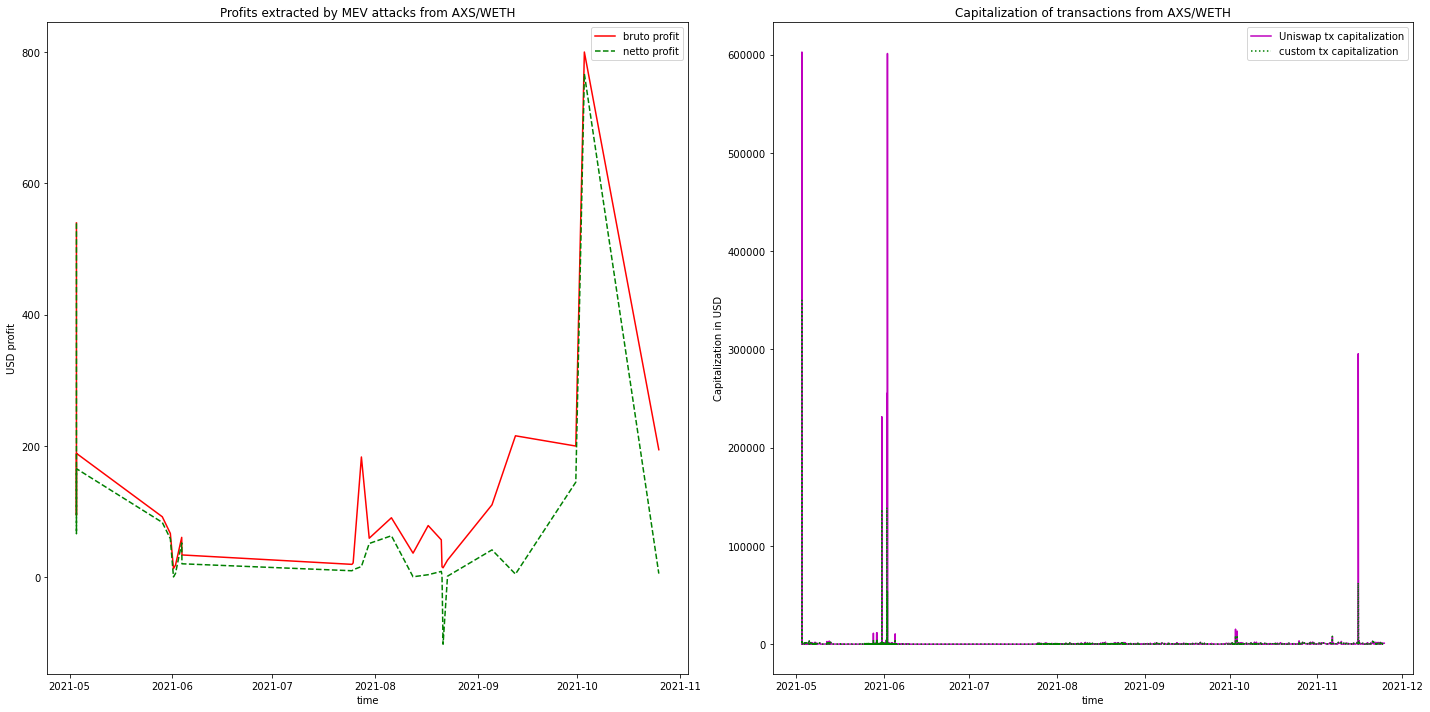

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_axs_weth_profits_df['timestamp'],
         grouped_axs_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_axs_weth_profits_df['timestamp'],
         grouped_axs_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from AXS/WETH')
ax1.legend()

ax2.plot(axs_weth_swaps_df['timestamp'],
         axs_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(axs_weth_swaps_df['timestamp'],
         axs_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from AXS/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## MANA/WETH

In [41]:
mana_weth_filtered_swaps_df, mana_weth_mevs_df = mana_weth_sim.extract_filtered_and_mevs_dfs()
mana_weth_mevs_df

initial len = 71999, filtered len = 71175
txds = 824
out values = 412


token_in token_out     amount_in    amount_out    amount_usd  \
495       MANA      WETH   2381.293568      0.457245    103.673264   
498       WETH      MANA      0.455000   2381.293568    103.324412   
4344      WETH      MANA      1.596094   8992.203316    610.719618   
4346      MANA      WETH   8992.203316      1.773011    667.569963   
4790      WETH      MANA      0.878126   3888.450000    294.572598   
...        ...       ...           ...           ...           ...   
71585     MANA      WETH   8424.198350      8.376879  33691.529275   
71595     MANA      WETH  13949.808302     14.054855  56315.848731   
71596     WETH      MANA     13.736229  13949.808302  55039.161637   
71972     WETH      MANA     10.170380  10579.185460  43398.317335   
71973     MANA      WETH  10579.185460     10.471206  44710.197851   

                timestamp                                      sender  \
495   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
498   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4344  2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4346  2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4790  2020-09-23 09:26:34  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                   ...                                         ...   
71585 2021-11-18 22:04:16  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
71595 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
71596 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
71972 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
71973 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                               to  \
495    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
498    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
4344   0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4346   0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4790   0x1d6c43b4d829334d88ce609d7728dc5f4736b3c7   
...                                           ...   
71585  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
71595  0x0000000000b92ac90d898eba87fa5f2483f32234   
71596  0x0000000000b92ac90d898eba87fa5f2483f32234   
71972  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
71973  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                                     txd  
495    0x263039051ae2d90c7df6aac281f1cea72fd8cb884044...  
498    0xdc55cd0b06400b1145028d27ac0cb1444451f8637771...  
4344   0x00fdc90ee71401a966cd88088c6701227d9859416e43...  
4346   0x730c87b3843b5ebc6ea52dc55ebcbc60b3c74c60644a...  
4790   0x22645626f338868d593ddd1fdd68ad19637d9312db2b...  
...                                                  ...  
71585  0x8a2d49cc6c97122d47edee4ea8938eea01e432346e48...  
71595  0x3e84b3f4620aefbc5a6cf712bb301c1f7a9c792c3153...  
71596  0xa25e91ada9bed356950bfdb451b28099dab655301d84...  
71972  0x17b8fdbe43e88eb5424eef2af00ad450a17a876320e8...  
71973  0xa4eaf0ac11b17260a226f1b1f864c7fe7ef530dc5fe8...  

[824 rows x 9 columns]

In [42]:
mana_weth_mevs_df = mana_weth_sim.calculate_attack_profit(mana_weth_mevs_df)
mana_weth_mevs_df = mana_weth_sim.calculate_attack_profit_by_token(mana_weth_mevs_df)

In [43]:
mana_price_df = mana_weth_sim.get_daily_token_price(first_to_second=False, token_name='MANA')
mana_price_df['date'] = mana_price_df['date'].dt.strftime("%Y-%m-%d")
mana_price_df

date  MANA_price
0    2020-05-18    0.000187
1    2020-05-19    0.000171
2    2020-05-20    0.000179
3    2020-05-21    0.000184
4    2020-05-22    0.000193
..          ...         ...
551  2021-11-20    0.000915
552  2021-11-21    0.000857
553  2021-11-22    0.001000
554  2021-11-23    0.000920
555  2021-11-24    0.001236

[556 rows x 2 columns]

In [44]:
mana_weth_mevs_df['date'] = mana_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mana_weth_mevs_df = pd.merge(mana_weth_mevs_df, mana_price_df, on='date', how='left')
mana_weth_mevs_df = pd.merge(mana_weth_mevs_df, weth_price_df, on='date', how='left')
mana_weth_mevs_df = pd.merge(mana_weth_mevs_df, nft_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [45]:
mana_weth_mevs_df['bruto_mana_to_usdc_profit'] = (mana_weth_mevs_df['MANA_profit'] * mana_weth_mevs_df['MANA_price'] *
                                                  mana_weth_mevs_df['WETH_price'])
mana_weth_mevs_df['bruto_total_profit'] = mana_weth_mevs_df['bruto_mana_to_usdc_profit'] + (mana_weth_mevs_df['WETH_profit'] *
                                                                                            mana_weth_mevs_df['WETH_price'])
mana_weth_mevs_df.loc[mana_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mana_weth_mevs_df['tx_fee'].median()
mana_weth_mevs_df.loc[mana_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = mana_weth_mevs_df['tx_fee'].median()
mana_weth_mevs_df['gas_costs_usd'] = (mana_weth_mevs_df['tx_fee'] * mana_weth_mevs_df['WETH_price'] *
                                      mana_weth_mevs_df['gas_usage_by_tx'])
mana_weth_mevs_df['netto_profit'] = mana_weth_mevs_df['bruto_total_profit'] - mana_weth_mevs_df['gas_costs_usd']
mana_weth_mevs_df.dropna(inplace=True)
mana_weth_mevs_df

token_in token_out     amount_in    amount_out    amount_usd  \
0       MANA      WETH   2381.293568      0.457245    103.673264   
1       WETH      MANA      0.455000   2381.293568    103.324412   
2       WETH      MANA      1.596094   8992.203316    610.719618   
3       MANA      WETH   8992.203316      1.773011    667.569963   
4       WETH      MANA      0.878126   3888.450000    294.572598   
..       ...       ...           ...           ...           ...   
819     MANA      WETH   8424.198350      8.376879  33691.529275   
820     MANA      WETH  13949.808302     14.054855  56315.848731   
821     WETH      MANA     13.736229  13949.808302  55039.161637   
822     WETH      MANA     10.170380  10579.185460  43398.317335   
823     MANA      WETH  10579.185460     10.471206  44710.197851   

              timestamp                                      sender  \
0   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2   2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
3   2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4   2020-09-23 09:26:34  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
..                  ...                                         ...   
819 2021-11-18 22:04:16  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
820 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
821 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
822 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
823 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                             to  \
0    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
2    0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
3    0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4    0x1d6c43b4d829334d88ce609d7728dc5f4736b3c7   
..                                          ...   
819  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
820  0x0000000000b92ac90d898eba87fa5f2483f32234   
821  0x0000000000b92ac90d898eba87fa5f2483f32234   
822  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
823  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                                   txd       profit  ...  \
0    0x263039051ae2d90c7df6aac281f1cea72fd8cb884044...     0.348852  ...   
1    0xdc55cd0b06400b1145028d27ac0cb1444451f8637771...     0.348852  ...   
2    0x00fdc90ee71401a966cd88088c6701227d9859416e43...    56.850345  ...   
3    0x730c87b3843b5ebc6ea52dc55ebcbc60b3c74c60644a...    56.850345  ...   
4    0x22645626f338868d593ddd1fdd68ad19637d9312db2b...     1.258084  ...   
..                                                 ...          ...  ...   
819  0x8a2d49cc6c97122d47edee4ea8938eea01e432346e48...   217.100746  ...   
820  0x3e84b3f4620aefbc5a6cf712bb301c1f7a9c792c3153...  1276.687095  ...   
821  0xa25e91ada9bed356950bfdb451b28099dab655301d84...  1276.687095  ...   
822  0x17b8fdbe43e88eb5424eef2af00ad450a17a876320e8...  1311.880516  ...   
823  0xa4eaf0ac11b17260a226f1b1f864c7fe7ef530dc5fe8...  1311.880516  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0     228.402071  10306250             162            99838      227.83   
1     228.402071  10306250             155           125902      227.83   
2     390.275390  10877847               7            68992      389.49   
3     390.275390  10877847             156            88838      389.49   
4     319.760848  10918044             121           131419      320.19   
..           ...       ...             ...              ...         ...   
819  3986.866652  13641886               5            79052     3998.17   
820  3986.866652  13641935               2            80204     3998.17   
821  3986.866652  13641935               0            90246     3998.17   
822  4289.007842  13647368               0            8899

In [46]:
print(len(mana_weth_mevs_df))
mana_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(mana_weth_mevs_df))
mana_weth_mevs_df

824
824


token_in token_out     amount_in    amount_out    amount_usd  \
0       MANA      WETH   2381.293568      0.457245    103.673264   
1       WETH      MANA      0.455000   2381.293568    103.324412   
2       WETH      MANA      1.596094   8992.203316    610.719618   
3       MANA      WETH   8992.203316      1.773011    667.569963   
4       WETH      MANA      0.878126   3888.450000    294.572598   
..       ...       ...           ...           ...           ...   
819     MANA      WETH   8424.198350      8.376879  33691.529275   
820     MANA      WETH  13949.808302     14.054855  56315.848731   
821     WETH      MANA     13.736229  13949.808302  55039.161637   
822     WETH      MANA     10.170380  10579.185460  43398.317335   
823     MANA      WETH  10579.185460     10.471206  44710.197851   

              timestamp                                      sender  \
0   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1   2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2   2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
3   2020-09-17 05:42:41  0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4   2020-09-23 09:26:34  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
..                  ...                                         ...   
819 2021-11-18 22:04:16  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
820 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
821 2021-11-18 22:14:55  0x0000000000b92ac90d898eba87fa5f2483f32234   
822 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
823 2021-11-19 19:17:57  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                             to  \
0    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
2    0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
3    0x743dd3139c6b70f664ab4329b2cde646f0bac99a   
4    0x1d6c43b4d829334d88ce609d7728dc5f4736b3c7   
..                                          ...   
819  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
820  0x0000000000b92ac90d898eba87fa5f2483f32234   
821  0x0000000000b92ac90d898eba87fa5f2483f32234   
822  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   
823  0x00000000a1f2d3063ed639d19a6a56be87e25b1a   

                                                   txd       profit  ...  \
0    0x263039051ae2d90c7df6aac281f1cea72fd8cb884044...     0.348852  ...   
1    0xdc55cd0b06400b1145028d27ac0cb1444451f8637771...     0.348852  ...   
2    0x00fdc90ee71401a966cd88088c6701227d9859416e43...    56.850345  ...   
3    0x730c87b3843b5ebc6ea52dc55ebcbc60b3c74c60644a...    56.850345  ...   
4    0x22645626f338868d593ddd1fdd68ad19637d9312db2b...     1.258084  ...   
..                                                 ...          ...  ...   
819  0x8a2d49cc6c97122d47edee4ea8938eea01e432346e48...   217.100746  ...   
820  0x3e84b3f4620aefbc5a6cf712bb301c1f7a9c792c3153...  1276.687095  ...   
821  0xa25e91ada9bed356950bfdb451b28099dab655301d84...  1276.687095  ...   
822  0x17b8fdbe43e88eb5424eef2af00ad450a17a876320e8...  1311.880516  ...   
823  0xa4eaf0ac11b17260a226f1b1f864c7fe7ef530dc5fe8...  1311.880516  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0     228.402071  10306250             162            99838      227.83   
1     228.402071  10306250             155           125902      227.83   
2     390.275390  10877847               7            68992      389.49   
3     390.275390  10877847             156            88838      389.49   
4     319.760848  10918044             121           131419      320.19   
..           ...       ...             ...              ...         ...   
819  3986.866652  13641886               5            79052     3998.17   
820  3986.866652  13641935               2            80204     3998.17   
821  3986.866652  13641935               0            90246     3998.17   
822  4289.007842  13647368               0            8899

### Bigger sandwiches and profits

In [47]:
mana_weth_count_df = mana_weth_mevs_df.value_counts(subset=['timestamp'])
mana_weth_count_df[mana_weth_count_df.values > 2]

Series([], dtype: int64)

In [48]:
grouped_mana_weth_profits_df = mana_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_mana_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_mana_weth_profits_df['block'] = grouped_mana_weth_profits_df['block'] / 2
grouped_mana_weth_profits_df['bruto_total_profit'] = grouped_mana_weth_profits_df['bruto_total_profit']/2
grouped_mana_weth_profits_df['netto_profit'] = (grouped_mana_weth_profits_df['bruto_total_profit'] -
                                               grouped_mana_weth_profits_df['gas_costs_usd'])
grouped_mana_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_mana_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_mana_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_mana_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_mana_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(mana_weth_mevs_df[mana_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(mana_weth_mevs_df[mana_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 18509.34702052215
min brutto profit 0.5128576720424162
max netto profit 9276.113150684023
min netto profit -100.91864835244856
zero bruto profit transactions = 0
transactions with losses = 37


In [49]:
print(fr"sum of paid gas = {sum(mana_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(mana_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(mana_weth_mevs_df['bruto_total_profit'] / 2) - sum(mana_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 121404.77507549892
sum of brutto profits = 212928.62009103442
sum of netto profits = 91523.8450155355


### Brutto profit to Uniswap capitalization coefficient

In [50]:
print("brutto attacks profits (" + str(sum(mana_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to MANA/WETH Uniswap capitalization (" + str(mana_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mana_weth_mevs_df['bruto_total_profit'] / 2) / mana_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (212928.62009103442) to MANA/WETH Uniswap capitalization (476146469.70281124) coef is equal to 0.00044719142877176993


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [51]:
mana_weth_swaps_df = mana_weth_sim.calculate_attack_profit_by_token(mana_weth_swaps_df)
mana_weth_swaps_df

token_in token_out   amount_in   amount_out    amount_usd  \
0         WETH      MANA    0.050000   275.955186      5.317078   
1         MANA      WETH  800.000000     0.140614     29.162929   
2         WETH      MANA    0.005000    29.943369      1.063490   
3         WETH      MANA    0.040000   235.611527      8.510489   
4         WETH      MANA    0.033072   190.000000      6.980768   
...        ...       ...         ...          ...           ...   
71994     WETH      MANA    0.028746    29.451902    122.516521   
71995     WETH      MANA    3.144065  3212.154135  13401.179611   
71996     WETH      MANA    0.171873   175.075738    733.371124   
71997     WETH      MANA    1.936086  1968.473991   8256.181204   
71998     WETH      MANA    0.034763    35.282654    148.266906   

                timestamp                                      sender  \
0     2020-05-18 20:24:15  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1     2020-05-19 00:25:27  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2     2020-05-19 01:29:18  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3     2020-05-19 01:34:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4     2020-05-19 06:44:23  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
...                   ...                                         ...   
71994 2021-11-19 21:26:45  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
71995 2021-11-19 21:28:22  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
71996 2021-11-19 21:38:21  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
71997 2021-11-19 21:46:53  0x6f8fa2495bd93c2a8f3984f1b1bd761bc1689eb4   
71998 2021-11-19 21:48:04  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                               to  \
0      0x7440779a961306dd7d8f27acb67ab6496aa3570c   
1      0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2      0xa53496e93e8183b62d80b3081ca6f8bd2cb9ada0   
3      0xe3d4b572c452138bf62cd0566ecea482f49b6424   
4      0x196a3dc8446920cef0f0d1f6bf7ba5b40702c79f   
...                                           ...   
71994  0x74de5d4fcbf63e00296fd95d33236b9794016631   
71995  0x95b47fa438762af1856a2d7dd68ef80af90c4ea9   
71996  0x666e8e22895fae5e3f8fa42dedcb407e60859ccb   
71997  0x6f8fa2495bd93c2a8f3984f1b1bd761bc1689eb4   
71998  0x74de5d4fcbf63e00296fd95d33236b9794016631   

                                                     txd  first_token_value  \
0      0x3fc44e5ee6779bcfaef10ce8a61f93e05aedfebff8d9...         275.955186   
1      0x139665acff25e60636028420a2dff6b8e009cdfa9701...         800.000000   
2      0xc0e676a272ce5cd33d5b9c36024f6d2e43c5429e86c7...          29.943369   
3      0x395c4738a2d0991e06b58c18e69f614abf05402f9100...         235.611527   
4      0xc5a68b1d08516ee37e0b648030dd88136db3c78fa62b...         190.000000   
...                                                  ...                ...   
71994  0x3ed6624e690b6fd4ea198f39646f5d4bb7d249be98b1...          29.451902   
71995  0xa3b1487d38dc9889cb9f86f0b780b82c637f47336ed6...        3212.154135   
71996  0xbfface16a7a11a1b20dd6b3eca3fe1233d440f281bab...         175.075738   
71997  0x0b11b300d032f33bdf00735aa43f8b8726462769af49...        1968.473991   
71998  0xbfe0dfad9af6e1f88fa8471519af95f8f60b09972f6d...          35.282654   

       second_token_value  MANA_profit  WETH_profit  
0                0.050000          0.0          0.0  
1                0.140614          0.0          0.0  
2                0.005000          0.0          0.0  
3                0.040000          0.0          0.0  
4                0.033072          0.0          0.0  
...                   ...          ...          ...  
71994            0.028746          0.0          0.0  
71995            3.144065          0.0          0.0  
71996            0.171873          0.0          0.0  
71997            1.936086          0.0          0.0  
71998            0.034763          0.0          0.0  

[71999 rows x 13 columns]

In [52]:
mana_price_df = mana_weth_sim.get_daily_token_price(first_to_second=False, token_name='MANA')
mana_price_df['date'] = mana_price_df['date'].dt.strftime("%Y-%m-%d")
mana_price_df

date  MANA_price
0    2020-05-18    0.000187
1    2020-05-19    0.000171
2    2020-05-20    0.000179
3    2020-05-21    0.000184
4    2020-05-22    0.000193
..          ...         ...
551  2021-11-20    0.000915
552  2021-11-21    0.000857
553  2021-11-22    0.001000
554  2021-11-23    0.000920
555  2021-11-24    0.001236

[556 rows x 2 columns]

In [53]:
mana_weth_swaps_df

token_in token_out   amount_in   amount_out    amount_usd  \
0         WETH      MANA    0.050000   275.955186      5.317078   
1         MANA      WETH  800.000000     0.140614     29.162929   
2         WETH      MANA    0.005000    29.943369      1.063490   
3         WETH      MANA    0.040000   235.611527      8.510489   
4         WETH      MANA    0.033072   190.000000      6.980768   
...        ...       ...         ...          ...           ...   
71994     WETH      MANA    0.028746    29.451902    122.516521   
71995     WETH      MANA    3.144065  3212.154135  13401.179611   
71996     WETH      MANA    0.171873   175.075738    733.371124   
71997     WETH      MANA    1.936086  1968.473991   8256.181204   
71998     WETH      MANA    0.034763    35.282654    148.266906   

                timestamp                                      sender  \
0     2020-05-18 20:24:15  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1     2020-05-19 00:25:27  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2     2020-05-19 01:29:18  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3     2020-05-19 01:34:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4     2020-05-19 06:44:23  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
...                   ...                                         ...   
71994 2021-11-19 21:26:45  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
71995 2021-11-19 21:28:22  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
71996 2021-11-19 21:38:21  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
71997 2021-11-19 21:46:53  0x6f8fa2495bd93c2a8f3984f1b1bd761bc1689eb4   
71998 2021-11-19 21:48:04  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                               to  \
0      0x7440779a961306dd7d8f27acb67ab6496aa3570c   
1      0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2      0xa53496e93e8183b62d80b3081ca6f8bd2cb9ada0   
3      0xe3d4b572c452138bf62cd0566ecea482f49b6424   
4      0x196a3dc8446920cef0f0d1f6bf7ba5b40702c79f   
...                                           ...   
71994  0x74de5d4fcbf63e00296fd95d33236b9794016631   
71995  0x95b47fa438762af1856a2d7dd68ef80af90c4ea9   
71996  0x666e8e22895fae5e3f8fa42dedcb407e60859ccb   
71997  0x6f8fa2495bd93c2a8f3984f1b1bd761bc1689eb4   
71998  0x74de5d4fcbf63e00296fd95d33236b9794016631   

                                                     txd  first_token_value  \
0      0x3fc44e5ee6779bcfaef10ce8a61f93e05aedfebff8d9...         275.955186   
1      0x139665acff25e60636028420a2dff6b8e009cdfa9701...         800.000000   
2      0xc0e676a272ce5cd33d5b9c36024f6d2e43c5429e86c7...          29.943369   
3      0x395c4738a2d0991e06b58c18e69f614abf05402f9100...         235.611527   
4      0xc5a68b1d08516ee37e0b648030dd88136db3c78fa62b...         190.000000   
...                                                  ...                ...   
71994  0x3ed6624e690b6fd4ea198f39646f5d4bb7d249be98b1...          29.451902   
71995  0xa3b1487d38dc9889cb9f86f0b780b82c637f47336ed6...        3212.154135   
71996  0xbfface16a7a11a1b20dd6b3eca3fe1233d440f281bab...         175.075738   
71997  0x0b11b300d032f33bdf00735aa43f8b8726462769af49...        1968.473991   
71998  0xbfe0dfad9af6e1f88fa8471519af95f8f60b09972f6d...          35.282654   

       second_token_value  MANA_profit  WETH_profit  
0                0.050000          0.0          0.0  
1                0.140614          0.0          0.0  
2                0.005000          0.0          0.0  
3                0.040000          0.0          0.0  
4                0.033072          0.0          0.0  
...                   ...          ...          ...  
71994            0.028746          0.0          0.0  
71995            3.144065          0.0          0.0  
71996            0.171873          0.0          0.0  
71997            1.936086          0.0          0.0  
71998            0.034763          0.0          0.0  

[71999 rows x 13 columns]

In [54]:
mana_weth_swaps_df['date'] = mana_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
mana_weth_swaps_df = pd.merge(mana_weth_swaps_df, mana_price_df, on='date', how='left')
mana_weth_swaps_df = pd.merge(mana_weth_swaps_df, weth_price_df, on='date', how='left')
mana_weth_swaps_df['cap_mana_to_usdc'] = (mana_weth_swaps_df['first_token_value'] * mana_weth_swaps_df['MANA_price'] *
                                          mana_weth_swaps_df['WETH_price'])
mana_weth_swaps_df['total_cap'] = mana_weth_swaps_df['cap_mana_to_usdc'] + (mana_weth_swaps_df['second_token_value'] *
                                                                            mana_weth_swaps_df['WETH_price'])

In [55]:
print("brutto attacks profits (" + str(sum(mana_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to MANA/WETH custom capitalization (" + str(mana_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mana_weth_mevs_df['bruto_total_profit'] / 2) / mana_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (212928.62009103442) to MANA/WETH custom capitalization (483487127.18264866) coef is equal to 0.0001101004598259943


### Netto profit to Uniswap capitalization coefficient

In [56]:
print("netto attacks profits (" + str(sum(mana_weth_mevs_df['netto_profit'] / 2)) +
      ") to MANA/WETH Uniswap capitalization (" + str(mana_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mana_weth_mevs_df['netto_profit'] / 2) / mana_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (152226.23255328534) to MANA/WETH Uniswap capitalization (476146469.70281124) coef is equal to 0.0003197046334257145


### Netto profit to custom capitalization coefficient

In [57]:
print("netto attacks profits (" + str(sum(mana_weth_mevs_df['netto_profit'] / 2)) +
      ") to MANA/WETH custom capitalization (" + str(mana_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mana_weth_mevs_df['netto_profit'] / 2) / mana_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (152226.23255328534) to MANA/WETH custom capitalization (483487127.18264866) coef is equal to 7.871266058329733e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [58]:
print("MANA/WETH pool contains " + str(len(mana_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(mana_weth_mevs_df)) + " MEV transactions) out of " + str(len(mana_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(mana_weth_mevs_df) / 2) / len(mana_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(mana_weth_mevs_df) / len(mana_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(mana_weth_mevs_df['amount_usd'].sum() / mana_weth_swaps_df['amount_usd'].sum()))

MANA/WETH pool contains 412.0 MEV attacks (or 824 MEV transactions) out of 71999 total transactions.
Coefficient of MEV attacks = 0.005722301698634703; coefficient of MEV transactions = 0.011444603397269406
Coef of MEV attacks cap = 0.06781365472078764


### Distributions of profits and capitalizations

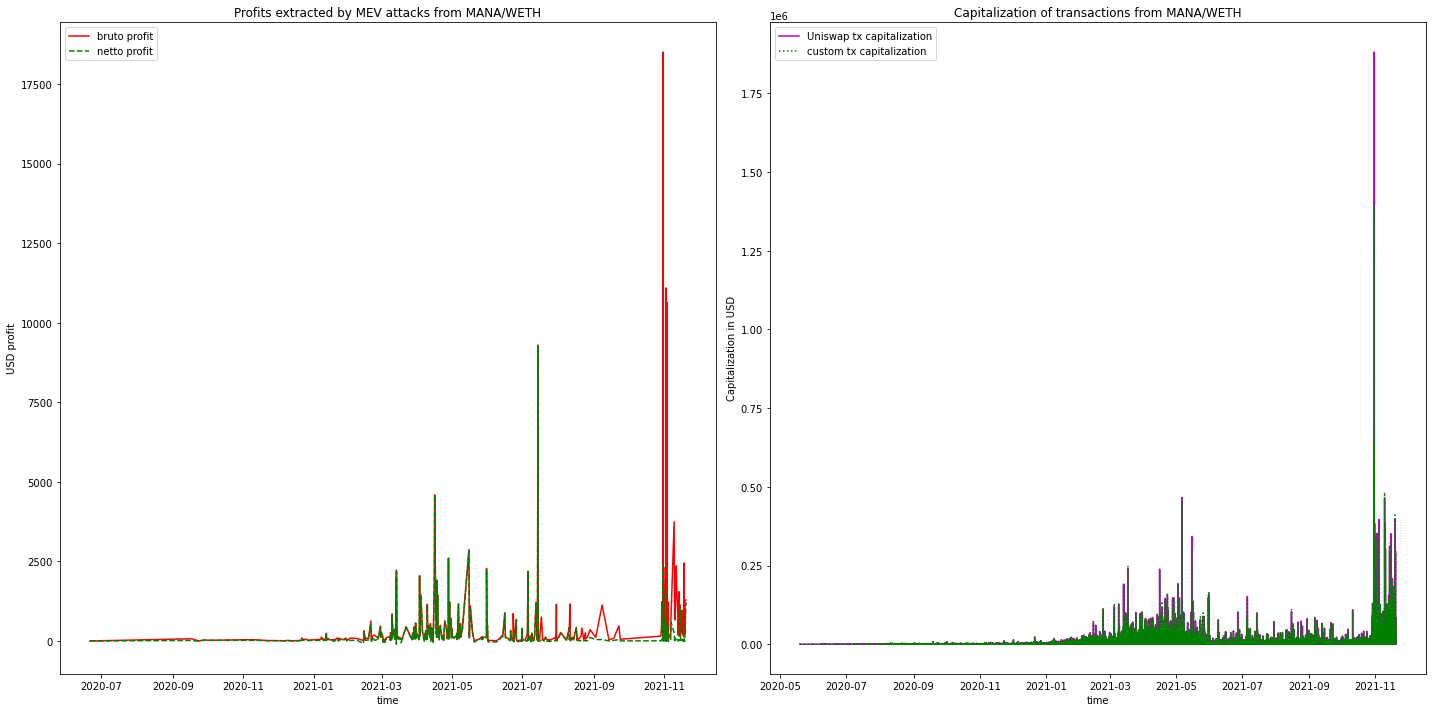

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_mana_weth_profits_df['timestamp'],
         grouped_mana_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_mana_weth_profits_df['timestamp'],
         grouped_mana_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from MANA/WETH')
ax1.legend()

ax2.plot(mana_weth_swaps_df['timestamp'],
         mana_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(mana_weth_swaps_df['timestamp'],
         mana_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from MANA/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## ENJ/WETH

In [60]:
enj_weth_filtered_swaps_df, enj_weth_mevs_df = enj_weth_sim.extract_filtered_and_mevs_dfs()
enj_weth_mevs_df

initial len = 74876, filtered len = 74084
txds = 792
out values = 396


token_in token_out    amount_in   amount_out    amount_usd  \
630        ENJ      WETH   662.819938     0.535345    130.226365   
631       WETH       ENJ     0.532000   662.819938    129.676004   
947       WETH       ENJ     0.985333  1297.063144    231.717919   
949        ENJ      WETH  1297.063144     1.003827    230.972512   
1045       ENJ      WETH   553.672738     0.405665     90.021480   
...        ...       ...          ...          ...           ...   
74418     WETH       ENJ     3.124676  3826.767730  13609.676308   
74643      ENJ      WETH  2396.686135     2.269874   9789.794720   
74644     WETH       ENJ     2.237428  2396.686135   9649.860137   
74762      ENJ      WETH  6060.278615     5.998629  25582.406849   
74763     WETH       ENJ     5.981826  6060.278615  25510.747133   

                timestamp                                      sender  \
630   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
631   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
947   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
949   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
1045  2020-06-29 12:37:46  0xeca2e07abc83c78a7178c46b84962af86de342ff   
...                   ...                                         ...   
74418 2021-11-21 04:03:34  0x000000000035b5e5ad9019092c665357240f594e   
74643 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
74644 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
74762 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   
74763 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   

                                               to  \
630    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
631    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
947    0xeca2e07abc83c78a7178c46b84962af86de342ff   
949    0xeca2e07abc83c78a7178c46b84962af86de342ff   
1045   0xeca2e07abc83c78a7178c46b84962af86de342ff   
...                                           ...   
74418  0x000000000035b5e5ad9019092c665357240f594e   
74643  0x000000000035b5e5ad9019092c665357240f594e   
74644  0x000000000035b5e5ad9019092c665357240f594e   
74762  0x000000000035b5e5ad9019092c665357240f594e   
74763  0x000000000035b5e5ad9019092c665357240f594e   

                                                     txd  
630    0x76e6f84c717415f830511897756521926b8a78679c71...  
631    0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...  
947    0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...  
949    0x74af70156234248ea93c0d3dcb7eb37bc2b8898a7cf0...  
1045   0x02340276cbca62ed21746076c0660bc92389be841768...  
...                                                  ...  
74418  0xb03ba9ef250bd0092de7a74eae769c7b6ffc10b09a4b...  
74643  0x1b938f76c1ec07dfca2f23bc1c2aac2cc403d0090441...  
74644  0x44223fb45cc1daf338dc2a6e09d946e0afb576d97c8c...  
74762  0xad64f50ab093e30b287e1de370ad2e3bbaa358a02bd5...  
74763  0xdcc052c9890348aef473bf3d5ddc805fb0982cf641ff...  

[792 rows x 9 columns]

In [61]:
enj_weth_mevs_df = enj_weth_sim.calculate_attack_profit(enj_weth_mevs_df)
enj_weth_mevs_df = enj_weth_sim.calculate_attack_profit_by_token(enj_weth_mevs_df)

In [62]:
enj_price_df = enj_weth_sim.get_daily_token_price(first_to_second=True, token_name='ENJ')
enj_price_df['date'] = enj_price_df['date'].dt.strftime("%Y-%m-%d")
enj_price_df

date  ENJ_price
0    2020-05-18   0.000744
1    2020-05-19   0.000780
2    2020-05-20   0.000797
3    2020-05-21   0.000901
4    2020-05-22   0.000855
..          ...        ...
551  2021-11-20   0.000825
552  2021-11-21   0.000785
553  2021-11-22   0.000871
554  2021-11-23   0.000887
555  2021-11-24   0.001041

[556 rows x 2 columns]

In [63]:
enj_weth_mevs_df['date'] = enj_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
enj_weth_mevs_df = pd.merge(enj_weth_mevs_df, enj_price_df, on='date', how='left')
enj_weth_mevs_df = pd.merge(enj_weth_mevs_df, weth_price_df, on='date', how='left')
enj_weth_mevs_df = pd.merge(enj_weth_mevs_df, nft_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [64]:
enj_weth_mevs_df['bruto_enj_to_usdc_profit'] = (enj_weth_mevs_df['ENJ_profit'] * enj_weth_mevs_df['ENJ_price'] *
                                                  enj_weth_mevs_df['WETH_price'])
enj_weth_mevs_df['bruto_total_profit'] = enj_weth_mevs_df['bruto_enj_to_usdc_profit'] + (enj_weth_mevs_df['WETH_profit'] *
                                                                                            enj_weth_mevs_df['WETH_price'])
enj_weth_mevs_df.loc[enj_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = enj_weth_mevs_df['tx_fee'].median()
enj_weth_mevs_df.loc[enj_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = enj_weth_mevs_df['tx_fee'].median()
enj_weth_mevs_df['gas_costs_usd'] = (enj_weth_mevs_df['tx_fee'] * enj_weth_mevs_df['WETH_price'] *
                                      enj_weth_mevs_df['gas_usage_by_tx'])
enj_weth_mevs_df['netto_profit'] = enj_weth_mevs_df['bruto_total_profit'] - enj_weth_mevs_df['gas_costs_usd']
enj_weth_mevs_df.dropna(inplace=True)
enj_weth_mevs_df

token_in token_out    amount_in   amount_out    amount_usd  \
0        ENJ      WETH   662.819938     0.535345    130.226365   
1       WETH       ENJ     0.532000   662.819938    129.676004   
2       WETH       ENJ     0.985333  1297.063144    231.717919   
3        ENJ      WETH  1297.063144     1.003827    230.972512   
4        ENJ      WETH   553.672738     0.405665     90.021480   
..       ...       ...          ...          ...           ...   
787     WETH       ENJ     3.124676  3826.767730  13609.676308   
788      ENJ      WETH  2396.686135     2.269874   9789.794720   
789     WETH       ENJ     2.237428  2396.686135   9649.860137   
790      ENJ      WETH  6060.278615     5.998629  25582.406849   
791     WETH       ENJ     5.981826  6060.278615  25510.747133   

              timestamp                                      sender  \
0   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
3   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
4   2020-06-29 12:37:46  0xeca2e07abc83c78a7178c46b84962af86de342ff   
..                  ...                                         ...   
787 2021-11-21 04:03:34  0x000000000035b5e5ad9019092c665357240f594e   
788 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
789 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
790 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   
791 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   

                                             to  \
0    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
2    0xeca2e07abc83c78a7178c46b84962af86de342ff   
3    0xeca2e07abc83c78a7178c46b84962af86de342ff   
4    0xeca2e07abc83c78a7178c46b84962af86de342ff   
..                                          ...   
787  0x000000000035b5e5ad9019092c665357240f594e   
788  0x000000000035b5e5ad9019092c665357240f594e   
789  0x000000000035b5e5ad9019092c665357240f594e   
790  0x000000000035b5e5ad9019092c665357240f594e   
791  0x000000000035b5e5ad9019092c665357240f594e   

                                                   txd      profit  ...  \
0    0x76e6f84c717415f830511897756521926b8a78679c71...    0.550361  ...   
1    0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...    0.550361  ...   
2    0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...    0.745406  ...   
3    0x74af70156234248ea93c0d3dcb7eb37bc2b8898a7cf0...    0.745406  ...   
4    0x02340276cbca62ed21746076c0660bc92389be841768...    0.615229  ...   
..                                                 ...         ...  ...   
787  0xb03ba9ef250bd0092de7a74eae769c7b6ffc10b09a4b...  133.009338  ...   
788  0x1b938f76c1ec07dfca2f23bc1c2aac2cc403d0090441...  139.934583  ...   
789  0x44223fb45cc1daf338dc2a6e09d946e0afb576d97c8c...  139.934583  ...   
790  0xad64f50ab093e30b287e1de370ad2e3bbaa358a02bd5...   71.659717  ...   
791  0xdcc052c9890348aef473bf3d5ddc805fb0982cf641ff...   71.659717  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0     245.912887  10224660             188            99040      246.47   
1     245.912887  10224660             175           125049      246.47   
2     232.423621  10330038               4            99132      234.56   
3     232.423621  10330038              22            87596      234.56   
4     227.052090  10360783             135            99330      227.86   
..           ...       ...             ...              ...         ...   
787  4272.637582  13655943               0            88473     4264.61   
788  4347.572488  13671604               4            78482     4341.17   
789  4347.572488  13671604               2            87173     4341.17   
790  4258.707179  13675530               5            78494     4271.96   
791  4258.707179  1

In [65]:
print(len(enj_weth_mevs_df))
enj_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(enj_weth_mevs_df))
enj_weth_mevs_df

792
792


token_in token_out    amount_in   amount_out    amount_usd  \
0        ENJ      WETH   662.819938     0.535345    130.226365   
1       WETH       ENJ     0.532000   662.819938    129.676004   
2       WETH       ENJ     0.985333  1297.063144    231.717919   
3        ENJ      WETH  1297.063144     1.003827    230.972512   
4        ENJ      WETH   553.672738     0.405665     90.021480   
..       ...       ...          ...          ...           ...   
787     WETH       ENJ     3.124676  3826.767730  13609.676308   
788      ENJ      WETH  2396.686135     2.269874   9789.794720   
789     WETH       ENJ     2.237428  2396.686135   9649.860137   
790      ENJ      WETH  6060.278615     5.998629  25582.406849   
791     WETH       ENJ     5.981826  6060.278615  25510.747133   

              timestamp                                      sender  \
0   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1   2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
3   2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
4   2020-06-29 12:37:46  0xeca2e07abc83c78a7178c46b84962af86de342ff   
..                  ...                                         ...   
787 2021-11-21 04:03:34  0x000000000035b5e5ad9019092c665357240f594e   
788 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
789 2021-11-23 15:18:49  0x000000000035b5e5ad9019092c665357240f594e   
790 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   
791 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   

                                             to  \
0    0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1    0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
2    0xeca2e07abc83c78a7178c46b84962af86de342ff   
3    0xeca2e07abc83c78a7178c46b84962af86de342ff   
4    0xeca2e07abc83c78a7178c46b84962af86de342ff   
..                                          ...   
787  0x000000000035b5e5ad9019092c665357240f594e   
788  0x000000000035b5e5ad9019092c665357240f594e   
789  0x000000000035b5e5ad9019092c665357240f594e   
790  0x000000000035b5e5ad9019092c665357240f594e   
791  0x000000000035b5e5ad9019092c665357240f594e   

                                                   txd      profit  ...  \
0    0x76e6f84c717415f830511897756521926b8a78679c71...    0.550361  ...   
1    0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...    0.550361  ...   
2    0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...    0.745406  ...   
3    0x74af70156234248ea93c0d3dcb7eb37bc2b8898a7cf0...    0.745406  ...   
4    0x02340276cbca62ed21746076c0660bc92389be841768...    0.615229  ...   
..                                                 ...         ...  ...   
787  0xb03ba9ef250bd0092de7a74eae769c7b6ffc10b09a4b...  133.009338  ...   
788  0x1b938f76c1ec07dfca2f23bc1c2aac2cc403d0090441...  139.934583  ...   
789  0x44223fb45cc1daf338dc2a6e09d946e0afb576d97c8c...  139.934583  ...   
790  0xad64f50ab093e30b287e1de370ad2e3bbaa358a02bd5...   71.659717  ...   
791  0xdcc052c9890348aef473bf3d5ddc805fb0982cf641ff...   71.659717  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0     245.912887  10224660             188            99040      246.47   
1     245.912887  10224660             175           125049      246.47   
2     232.423621  10330038               4            99132      234.56   
3     232.423621  10330038              22            87596      234.56   
4     227.052090  10360783             135            99330      227.86   
..           ...       ...             ...              ...         ...   
787  4272.637582  13655943               0            88473     4264.61   
788  4347.572488  13671604               4            78482     4341.17   
789  4347.572488  13671604               2            87173     4341.17   
790  4258.707179  13675530               5            78494     4271.96   
791  4258.707179  1

### Bigger sandwiches and profits

In [66]:
enj_weth_count_df = enj_weth_mevs_df.value_counts(subset=['timestamp'])
enj_weth_count_df[enj_weth_count_df.values > 2]

Series([], dtype: int64)

In [67]:
grouped_enj_weth_profits_df = enj_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_enj_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_enj_weth_profits_df['block'] = grouped_enj_weth_profits_df['block'] / 2
grouped_enj_weth_profits_df['bruto_total_profit'] = grouped_enj_weth_profits_df['bruto_total_profit']/2
grouped_enj_weth_profits_df['netto_profit'] = (grouped_enj_weth_profits_df['bruto_total_profit'] -
                                               grouped_enj_weth_profits_df['gas_costs_usd'])
grouped_enj_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_enj_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_enj_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_enj_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_enj_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(enj_weth_mevs_df[enj_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(enj_weth_mevs_df[enj_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 15098.809126244229
min brutto profit 0.8226503462232326
max netto profit 9699.775975929244
min netto profit -498.8924255075357
zero bruto profit transactions = 0
transactions with losses = 33


In [68]:
print(fr"sum of paid gas = {sum(enj_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(enj_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(enj_weth_mevs_df['bruto_total_profit'] / 2) - sum(enj_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 32701.034437761376
sum of brutto profits = 116182.53849925744
sum of netto profits = 83481.50406149606


### Brutto profit to Uniswap capitalization coefficient

In [69]:
print("brutto attacks profits (" + str(sum(enj_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to enj/WETH Uniswap capitalization (" + str(enj_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(enj_weth_mevs_df['bruto_total_profit'] / 2) / enj_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (116182.53849925744) to enj/WETH Uniswap capitalization (340381406.8150719) coef is equal to 0.0003413304492344937


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [70]:
enj_weth_swaps_df = enj_weth_sim.calculate_attack_profit_by_token(enj_weth_swaps_df)
enj_weth_swaps_df

token_in token_out    amount_in   amount_out    amount_usd  \
0         WETH       ENJ     0.250000   329.243700     53.924783   
1         WETH       ENJ     0.003249     4.206203      0.690529   
2         WETH       ENJ     0.050000    64.528525     10.633417   
3         WETH       ENJ     0.050000    64.156216     10.632978   
4         WETH       ENJ     0.010000    12.786805      2.124114   
...        ...       ...          ...          ...           ...   
74871      ENJ      WETH  2304.294278     2.326421   9906.938755   
74872      ENJ      WETH   841.767937     0.838110   3562.650658   
74873     WETH       ENJ     2.697346  2671.158233  11453.855577   
74874     WETH       ENJ     2.285582  2214.713838   9703.431273   
74875     WETH       ENJ     0.235667   225.874332   1000.558564   

                timestamp                                      sender  \
0     2020-05-19 00:27:03  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1     2020-05-19 01:25:30  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2     2020-05-19 01:48:49  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3     2020-05-19 01:52:46  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4     2020-05-19 01:56:57  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
...                   ...                                         ...   
74871 2021-11-24 16:02:08  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
74872 2021-11-24 16:06:42  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
74873 2021-11-24 16:07:23  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
74874 2021-11-24 16:18:05  0x55ebdab1d9c3ab7220f388e7f7349e0af34cccd1   
74875 2021-11-24 16:18:40  0x11111112542d85b3ef69ae05771c2dccff4faa26   

                                               to  \
0      0x52cc3da7d6907b25fcd4e2c3b83f7edc5b31c949   
1      0x1880b9b34fc7f59cb43dd53a6b5c6de9fedfd271   
2      0x537158466a8ca115157f0b291a984efa8e528876   
3      0x0b2387b557e4f1ce550047cf1639249cd9db886c   
4      0x672b8144fe28a33bfe9678e880ff2e78b4c82705   
...                                           ...   
74871  0x9008d19f58aabd9ed0d60971565aa8510560ab41   
74872  0x0cecc726d097c756c62272f1180ebfff29cb57f9   
74873  0x4a137fd5e7a256ef08a7de531a17d0be0cc7b6b6   
74874  0x55ebdab1d9c3ab7220f388e7f7349e0af34cccd1   
74875  0x3ba074c486e35107fa09df245c8ca8839a3a96a6   

                                                     txd  first_token_value  \
0      0x70eb748663e95bcbfa16a060822a419c501198aeeaef...         329.243700   
1      0x9bb753a638997e639952f3fc859e523877b35e0021e5...           4.206203   
2      0xad45c006d28353fc5e472a850237dadea38688234e7d...          64.528525   
3      0xc6d101a2253e47f58f62eb809cfca170542695561b6e...          64.156216   
4      0xd7de4379d9a6c45e84d92da6ebade9de48da8e531c94...          12.786805   
...                                                  ...                ...   
74871  0xcbc8beb677625355510d257d15d30d972ce10c3b5b73...        2304.294278   
74872  0x786495220790e0f4e3c22ac79fc9f2c347a2e12d7a6e...         841.767937   
74873  0x40fbfa1adfcbe84615fa540ec3cefa5dd13cde300ab7...        2671.158233   
74874  0x28efd6652f23a24127dcb6d446b4914eb882110cc0b7...        2214.713838   
74875  0x8d6ba7f02c59a7e80b3312f9eaf33fade9c6af80aa83...         225.874332   

       second_token_value  ENJ_profit  WETH_profit  
0                0.250000         0.0          0.0  
1                0.003249         0.0          0.0  
2                0.050000         0.0          0.0  
3                0.050000         0.0          0.0  
4                0.010000         0.0          0.0  
...                   ...         ...          ...  
74871            2.326421         0.0          0.0  
74872            0.838110         0.0          0.0  
74873            2.697346         0.0          0.0  
74874            2.285582         0.0          0.0  
74875            0.235667         0.0          0.0  

[74876 rows x 13 columns]

In [71]:
enj_price_df = enj_weth_sim.get_daily_token_price(first_to_second=True, token_name='ENJ')
enj_price_df['date'] = enj_price_df['date'].dt.strftime("%Y-%m-%d")
enj_price_df

date  ENJ_price
0    2020-05-18   0.000744
1    2020-05-19   0.000780
2    2020-05-20   0.000797
3    2020-05-21   0.000901
4    2020-05-22   0.000855
..          ...        ...
551  2021-11-20   0.000825
552  2021-11-21   0.000785
553  2021-11-22   0.000871
554  2021-11-23   0.000887
555  2021-11-24   0.001041

[556 rows x 2 columns]

In [72]:
enj_weth_swaps_df

token_in token_out    amount_in   amount_out    amount_usd  \
0         WETH       ENJ     0.250000   329.243700     53.924783   
1         WETH       ENJ     0.003249     4.206203      0.690529   
2         WETH       ENJ     0.050000    64.528525     10.633417   
3         WETH       ENJ     0.050000    64.156216     10.632978   
4         WETH       ENJ     0.010000    12.786805      2.124114   
...        ...       ...          ...          ...           ...   
74871      ENJ      WETH  2304.294278     2.326421   9906.938755   
74872      ENJ      WETH   841.767937     0.838110   3562.650658   
74873     WETH       ENJ     2.697346  2671.158233  11453.855577   
74874     WETH       ENJ     2.285582  2214.713838   9703.431273   
74875     WETH       ENJ     0.235667   225.874332   1000.558564   

                timestamp                                      sender  \
0     2020-05-19 00:27:03  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1     2020-05-19 01:25:30  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2     2020-05-19 01:48:49  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3     2020-05-19 01:52:46  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4     2020-05-19 01:56:57  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
...                   ...                                         ...   
74871 2021-11-24 16:02:08  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
74872 2021-11-24 16:06:42  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
74873 2021-11-24 16:07:23  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
74874 2021-11-24 16:18:05  0x55ebdab1d9c3ab7220f388e7f7349e0af34cccd1   
74875 2021-11-24 16:18:40  0x11111112542d85b3ef69ae05771c2dccff4faa26   

                                               to  \
0      0x52cc3da7d6907b25fcd4e2c3b83f7edc5b31c949   
1      0x1880b9b34fc7f59cb43dd53a6b5c6de9fedfd271   
2      0x537158466a8ca115157f0b291a984efa8e528876   
3      0x0b2387b557e4f1ce550047cf1639249cd9db886c   
4      0x672b8144fe28a33bfe9678e880ff2e78b4c82705   
...                                           ...   
74871  0x9008d19f58aabd9ed0d60971565aa8510560ab41   
74872  0x0cecc726d097c756c62272f1180ebfff29cb57f9   
74873  0x4a137fd5e7a256ef08a7de531a17d0be0cc7b6b6   
74874  0x55ebdab1d9c3ab7220f388e7f7349e0af34cccd1   
74875  0x3ba074c486e35107fa09df245c8ca8839a3a96a6   

                                                     txd  first_token_value  \
0      0x70eb748663e95bcbfa16a060822a419c501198aeeaef...         329.243700   
1      0x9bb753a638997e639952f3fc859e523877b35e0021e5...           4.206203   
2      0xad45c006d28353fc5e472a850237dadea38688234e7d...          64.528525   
3      0xc6d101a2253e47f58f62eb809cfca170542695561b6e...          64.156216   
4      0xd7de4379d9a6c45e84d92da6ebade9de48da8e531c94...          12.786805   
...                                                  ...                ...   
74871  0xcbc8beb677625355510d257d15d30d972ce10c3b5b73...        2304.294278   
74872  0x786495220790e0f4e3c22ac79fc9f2c347a2e12d7a6e...         841.767937   
74873  0x40fbfa1adfcbe84615fa540ec3cefa5dd13cde300ab7...        2671.158233   
74874  0x28efd6652f23a24127dcb6d446b4914eb882110cc0b7...        2214.713838   
74875  0x8d6ba7f02c59a7e80b3312f9eaf33fade9c6af80aa83...         225.874332   

       second_token_value  ENJ_profit  WETH_profit  
0                0.250000         0.0          0.0  
1                0.003249         0.0          0.0  
2                0.050000         0.0          0.0  
3                0.050000         0.0          0.0  
4                0.010000         0.0          0.0  
...                   ...         ...          ...  
74871            2.326421         0.0          0.0  
74872            0.838110         0.0          0.0  
74873            2.697346         0.0          0.0  
74874            2.285582         0.0          0.0  
74875            0.235667         0.0          0.0  

[74876 rows x 13 columns]

In [73]:
enj_weth_swaps_df['date'] = enj_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
enj_weth_swaps_df = pd.merge(enj_weth_swaps_df, enj_price_df, on='date', how='left')
enj_weth_swaps_df = pd.merge(enj_weth_swaps_df, weth_price_df, on='date', how='left')
enj_weth_swaps_df['cap_enj_to_usdc'] = (enj_weth_swaps_df['first_token_value'] * enj_weth_swaps_df['ENJ_price'] *
                                          enj_weth_swaps_df['WETH_price'])
enj_weth_swaps_df['total_cap'] = enj_weth_swaps_df['cap_enj_to_usdc'] + (enj_weth_swaps_df['second_token_value'] *
                                                                            enj_weth_swaps_df['WETH_price'])

In [74]:
print("brutto attacks profits (" + str(sum(enj_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to enj/WETH custom capitalization (" + str(enj_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(enj_weth_mevs_df['bruto_total_profit'] / 2) / enj_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (116182.53849925744) to enj/WETH custom capitalization (334591990.9540896) coef is equal to 8.680911501196035e-05


### Netto profit to Uniswap capitalization coefficient

In [75]:
print("netto attacks profits (" + str(sum(enj_weth_mevs_df['netto_profit'] / 2)) +
      ") to enj/WETH Uniswap capitalization (" + str(enj_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(enj_weth_mevs_df['netto_profit'] / 2) / enj_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (99832.0212803768) to enj/WETH Uniswap capitalization (340381406.8150719) coef is equal to 0.0002932945786154977


### Netto profit to custom capitalization coefficient

In [76]:
print("netto attacks profits (" + str(sum(enj_weth_mevs_df['netto_profit'] / 2)) +
      ") to enj/WETH custom capitalization (" + str(enj_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(enj_weth_mevs_df['netto_profit'] / 2) / enj_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (99832.0212803768) to enj/WETH custom capitalization (334591990.9540896) coef is equal to 7.459235724359811e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [77]:
print("enj/WETH pool contains " + str(len(enj_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(enj_weth_mevs_df)) + " MEV transactions) out of " + str(len(enj_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(enj_weth_mevs_df) / 2) / len(enj_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(enj_weth_mevs_df) / len(enj_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(enj_weth_mevs_df['amount_usd'].sum() / enj_weth_swaps_df['amount_usd'].sum()))

enj/WETH pool contains 396.0 MEV attacks (or 792 MEV transactions) out of 74876 total transactions.
Coefficient of MEV attacks = 0.005288744056840643; coefficient of MEV transactions = 0.010577488113681286
Coef of MEV attacks cap = 0.05622482271252666


### Distributions of profits and capitalizations

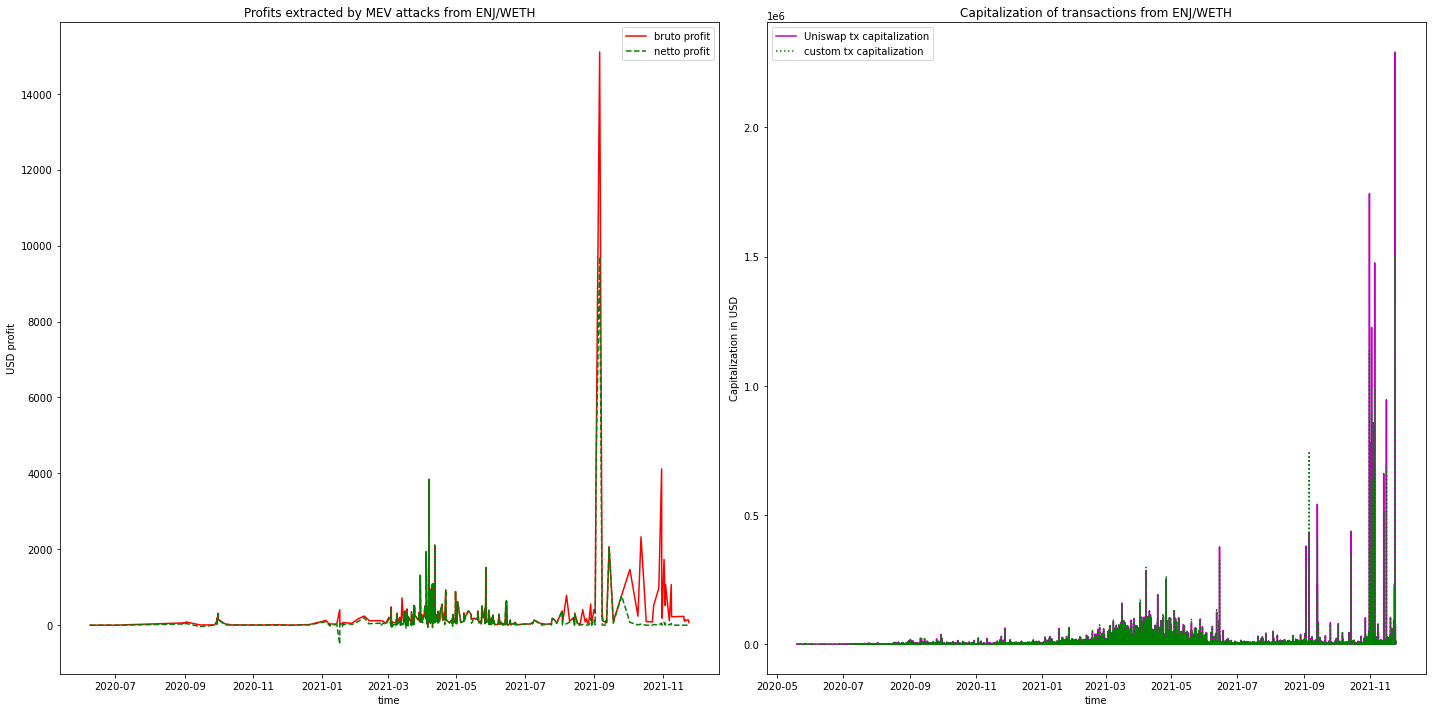

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_enj_weth_profits_df['timestamp'],
         grouped_enj_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_enj_weth_profits_df['timestamp'],
         grouped_enj_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from ENJ/WETH')
ax1.legend()

ax2.plot(enj_weth_swaps_df['timestamp'],
         enj_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(enj_weth_swaps_df['timestamp'],
         enj_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from ENJ/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## SAND/WETH

In [79]:
sand_weth_filtered_swaps_df, sand_weth_mevs_df = sand_weth_sim.extract_filtered_and_mevs_dfs()
sand_weth_mevs_df

initial len = 129994, filtered len = 128700
txds = 1294
out values = 647


token_in token_out      amount_in     amount_out     amount_usd  \
935        SAND      WETH  118333.466152      17.386836    6323.179425   
937        WETH      SAND      16.955749  118333.466152    6599.387976   
1078       SAND      WETH   43096.029735       5.855678    2104.246690   
1079       WETH      SAND       5.674984   43096.029735    2083.122357   
1109       WETH      SAND       5.674984   43606.883080    2099.229261   
...         ...       ...            ...            ...            ...   
129337     SAND      WETH   19501.231147      11.768869   54815.026241   
129357     SAND      WETH   20489.353461      12.845562   59679.586160   
129358     WETH      SAND      12.693029   20489.353461   58970.926403   
129536     SAND      WETH  105063.419069      70.109627  324602.318361   
129538     WETH      SAND      69.656558  105063.419069  322504.645412   

                 timestamp                                      sender  \
935    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
937    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
1078   2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
1079   2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
1109   2020-09-16 12:47:59  0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                    ...                                         ...   
129337 2021-11-13 01:54:36  0x000000005736775feb0c8568e7dee77222a26880   
129357 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
129358 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
129536 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
129538 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                to  \
935     0xd25174f42596bc4eaa83116a368dd237664c9392   
937     0x494cc492c9f01699bff1449180201dbfbd592ea5   
1078    0xd25174f42596bc4eaa83116a368dd237664c9392   
1079    0x494cc492c9f01699bff1449180201dbfbd592ea5   
1109    0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                                            ...   
129337  0x000000005736775feb0c8568e7dee77222a26880   
129357  0x000000005736775feb0c8568e7dee77222a26880   
129358  0x000000005736775feb0c8568e7dee77222a26880   
129536  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
129538  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                      txd  
935     0x7d6d48beb1f5e8959f064205e73e94958b269a9ef293...  
937     0xe91d979c590e2f3e0eb14ebcc8e30830f43f92a82d34...  
1078    0x88a6999cf2724b03bb42e988cf9f1d36b240a3b147d8...  
1079    0xabe68044cfe94cde0913c46e5491fc055eb15f54f60a...  
1109    0xd713c16a51c60934cc3644e8b6b616da03deba37b491...  
...                                                   ...  
129337  0xd3989ac6e21e035a44fe85422f338db92c7558164a28...  
129357  0x21bbbde8371cb97208e74b9db7bfcb632010958593b2...  
129358  0x56fad757939d82a82c1976daf4f851bf309afc01e237...  
129536  0x3c1e03453ca898512b9752d11ed0969ee69e5b1c1e2c...  
129538  0xbeba6d9961c9d2ec4fe278ffee723aa32a12b4e0905b...  

[1294 rows x 9 columns]

In [80]:
sand_weth_mevs_df = sand_weth_sim.calculate_attack_profit(sand_weth_mevs_df)
sand_weth_mevs_df = sand_weth_sim.calculate_attack_profit_by_token(sand_weth_mevs_df)

In [81]:
sand_price_df = sand_weth_sim.get_daily_token_price(first_to_second=False, token_name='SAND')
sand_price_df['date'] = sand_price_df['date'].dt.strftime("%Y-%m-%d")
sand_price_df

date  SAND_price
0    2020-08-20    0.000140
1    2020-08-21    0.000118
2    2020-08-22    0.000129
3    2020-08-23    0.000124
4    2020-08-24    0.000125
..          ...         ...
457  2021-11-20    0.000958
458  2021-11-21    0.000945
459  2021-11-22    0.001212
460  2021-11-23    0.001234
461  2021-11-24    0.001779

[462 rows x 2 columns]

In [82]:
sand_weth_mevs_df['date'] = sand_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
sand_weth_mevs_df = pd.merge(sand_weth_mevs_df, sand_price_df, on='date', how='left')
sand_weth_mevs_df = pd.merge(sand_weth_mevs_df, weth_price_df, on='date', how='left')
sand_weth_mevs_df = pd.merge(sand_weth_mevs_df, nft_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [83]:
sand_weth_mevs_df['bruto_sand_to_usdc_profit'] = (sand_weth_mevs_df['SAND_profit'] * sand_weth_mevs_df['SAND_price'] *
                                                  sand_weth_mevs_df['WETH_price'])
sand_weth_mevs_df['bruto_total_profit'] = sand_weth_mevs_df['bruto_sand_to_usdc_profit'] + (sand_weth_mevs_df['WETH_profit'] *
                                                                                            sand_weth_mevs_df['WETH_price'])
sand_weth_mevs_df.loc[sand_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = sand_weth_mevs_df['tx_fee'].median()
sand_weth_mevs_df.loc[sand_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = sand_weth_mevs_df['tx_fee'].median()
sand_weth_mevs_df['gas_costs_usd'] = (sand_weth_mevs_df['tx_fee'] * sand_weth_mevs_df['WETH_price'] *
                                      sand_weth_mevs_df['gas_usage_by_tx'])
sand_weth_mevs_df['netto_profit'] = sand_weth_mevs_df['bruto_total_profit'] - sand_weth_mevs_df['gas_costs_usd']
sand_weth_mevs_df.dropna(inplace=True)
sand_weth_mevs_df

token_in token_out      amount_in     amount_out     amount_usd  \
0        SAND      WETH  118333.466152      17.386836    6323.179425   
1        WETH      SAND      16.955749  118333.466152    6599.387976   
2        SAND      WETH   43096.029735       5.855678    2104.246690   
3        WETH      SAND       5.674984   43096.029735    2083.122357   
4        WETH      SAND       5.674984   43606.883080    2099.229261   
...       ...       ...            ...            ...            ...   
1345     SAND      WETH   19501.231147      11.768869   54815.026241   
1346     SAND      WETH   20489.353461      12.845562   59679.586160   
1347     WETH      SAND      12.693029   20489.353461   58970.926403   
1348     SAND      WETH  105063.419069      70.109627  324602.318361   
1349     WETH      SAND      69.656558  105063.419069  322504.645412   

               timestamp                                      sender  \
0    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
1    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
2    2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
3    2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
4    2020-09-16 12:47:59  0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                  ...                                         ...   
1345 2021-11-13 01:54:36  0x000000005736775feb0c8568e7dee77222a26880   
1346 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
1347 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
1348 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
1349 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                              to  \
0     0xd25174f42596bc4eaa83116a368dd237664c9392   
1     0x494cc492c9f01699bff1449180201dbfbd592ea5   
2     0xd25174f42596bc4eaa83116a368dd237664c9392   
3     0x494cc492c9f01699bff1449180201dbfbd592ea5   
4     0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                                          ...   
1345  0x000000005736775feb0c8568e7dee77222a26880   
1346  0x000000005736775feb0c8568e7dee77222a26880   
1347  0x000000005736775feb0c8568e7dee77222a26880   
1348  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
1349  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                    txd       profit  ...  \
0     0x7d6d48beb1f5e8959f064205e73e94958b269a9ef293...   276.208551  ...   
1     0xe91d979c590e2f3e0eb14ebcc8e30830f43f92a82d34...   276.208551  ...   
2     0x88a6999cf2724b03bb42e988cf9f1d36b240a3b147d8...    21.124332  ...   
3     0xabe68044cfe94cde0913c46e5491fc055eb15f54f60a...    21.124332  ...   
4     0xd713c16a51c60934cc3644e8b6b616da03deba37b491...    83.078662  ...   
...                                                 ...          ...  ...   
1345  0xd3989ac6e21e035a44fe85422f338db92c7558164a28...   349.995564  ...   
1346  0x21bbbde8371cb97208e74b9db7bfcb632010958593b2...   708.659757  ...   
1347  0x56fad757939d82a82c1976daf4f851bf309afc01e237...   708.659757  ...   
1348  0x3c1e03453ca898512b9752d11ed0969ee69e5b1c1e2c...  2097.672949  ...   
1349  0xbeba6d9961c9d2ec4fe278ffee723aa32a12b4e0905b...  2097.672949  ...   

       WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0      362.283023  10866278              11            98071      364.19   
1      362.283023  10866278               7            75555      364.19   
2      365.968810  10873080             129            98071      365.19   
3      365.968810  10873080              33            74928      365.19   
4      365.968810  10873271               0            74928      365.19   
...           ...       ...             ...              ...         ...   
1345  4644.623770  13604886               5            76214     4645.64   
1346  4644.623770  13605053               2            76214     4645.64   
1347  4644.623770  13605053              

In [84]:
print(len(sand_weth_mevs_df))
sand_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(sand_weth_mevs_df))
sand_weth_mevs_df

1350
1294


token_in token_out      amount_in     amount_out     amount_usd  \
0        SAND      WETH  118333.466152      17.386836    6323.179425   
1        WETH      SAND      16.955749  118333.466152    6599.387976   
2        SAND      WETH   43096.029735       5.855678    2104.246690   
3        WETH      SAND       5.674984   43096.029735    2083.122357   
4        WETH      SAND       5.674984   43606.883080    2099.229261   
...       ...       ...            ...            ...            ...   
1345     SAND      WETH   19501.231147      11.768869   54815.026241   
1346     SAND      WETH   20489.353461      12.845562   59679.586160   
1347     WETH      SAND      12.693029   20489.353461   58970.926403   
1348     SAND      WETH  105063.419069      70.109627  324602.318361   
1349     WETH      SAND      69.656558  105063.419069  322504.645412   

               timestamp                                      sender  \
0    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
1    2020-09-15 11:10:11  0x494cc492c9f01699bff1449180201dbfbd592ea5   
2    2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
3    2020-09-16 12:10:50  0x494cc492c9f01699bff1449180201dbfbd592ea5   
4    2020-09-16 12:47:59  0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                  ...                                         ...   
1345 2021-11-13 01:54:36  0x000000005736775feb0c8568e7dee77222a26880   
1346 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
1347 2021-11-13 02:30:19  0x000000005736775feb0c8568e7dee77222a26880   
1348 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
1349 2021-11-13 08:46:25  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                              to  \
0     0xd25174f42596bc4eaa83116a368dd237664c9392   
1     0x494cc492c9f01699bff1449180201dbfbd592ea5   
2     0xd25174f42596bc4eaa83116a368dd237664c9392   
3     0x494cc492c9f01699bff1449180201dbfbd592ea5   
4     0x494cc492c9f01699bff1449180201dbfbd592ea5   
...                                          ...   
1345  0x000000005736775feb0c8568e7dee77222a26880   
1346  0x000000005736775feb0c8568e7dee77222a26880   
1347  0x000000005736775feb0c8568e7dee77222a26880   
1348  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
1349  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                    txd       profit  ...  \
0     0x7d6d48beb1f5e8959f064205e73e94958b269a9ef293...   276.208551  ...   
1     0xe91d979c590e2f3e0eb14ebcc8e30830f43f92a82d34...   276.208551  ...   
2     0x88a6999cf2724b03bb42e988cf9f1d36b240a3b147d8...    21.124332  ...   
3     0xabe68044cfe94cde0913c46e5491fc055eb15f54f60a...    21.124332  ...   
4     0xd713c16a51c60934cc3644e8b6b616da03deba37b491...    83.078662  ...   
...                                                 ...          ...  ...   
1345  0xd3989ac6e21e035a44fe85422f338db92c7558164a28...   349.995564  ...   
1346  0x21bbbde8371cb97208e74b9db7bfcb632010958593b2...   708.659757  ...   
1347  0x56fad757939d82a82c1976daf4f851bf309afc01e237...   708.659757  ...   
1348  0x3c1e03453ca898512b9752d11ed0969ee69e5b1c1e2c...  2097.672949  ...   
1349  0xbeba6d9961c9d2ec4fe278ffee723aa32a12b4e0905b...  2097.672949  ...   

       WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0      362.283023  10866278              11            98071      364.19   
1      362.283023  10866278               7            75555      364.19   
2      365.968810  10873080             129            98071      365.19   
3      365.968810  10873080              33            74928      365.19   
4      365.968810  10873271               0            74928      365.19   
...           ...       ...             ...              ...         ...   
1345  4644.623770  13604886               5            76214     4645.64   
1346  4644.623770  13605053               2            76214     4645.64   
1347  4644.623770  13605053              

### Bigger sandwiches and profits

In [85]:
sand_weth_count_df = sand_weth_mevs_df.value_counts(subset=['timestamp'])
sand_weth_count_df[sand_weth_count_df.values > 2]

timestamp          
2021-01-21 08:09:22    4
2021-01-21 08:47:46    4
2020-11-30 06:04:25    4
2020-11-12 11:56:45    4
2020-11-09 01:40:38    4
2021-01-21 08:01:10    4
2021-01-21 08:06:54    4
2021-01-21 08:11:08    4
2021-01-21 08:24:41    4
2021-01-21 08:30:00    4
2021-01-21 08:34:15    4
2021-01-21 08:38:50    4
2021-01-21 08:38:57    4
2020-09-27 05:30:02    4
2020-11-22 17:29:26    4
2020-09-25 09:51:42    4
2020-09-25 16:57:13    4
dtype: int64

In [86]:
grouped_sand_weth_profits_df = sand_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_sand_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_sand_weth_profits_df['block'] = grouped_sand_weth_profits_df['block'] / 2
grouped_sand_weth_profits_df['bruto_total_profit'] = grouped_sand_weth_profits_df['bruto_total_profit']/2
grouped_sand_weth_profits_df['netto_profit'] = (grouped_sand_weth_profits_df['bruto_total_profit'] -
                                               grouped_sand_weth_profits_df['gas_costs_usd'])
grouped_sand_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_sand_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_sand_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_sand_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_sand_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(sand_weth_mevs_df[sand_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(sand_weth_mevs_df[sand_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 20405.87239336477
min brutto profit 0.8753688755816182
max netto profit 19714.144551603575
min netto profit -2155.649419636085
zero bruto profit transactions = 0
transactions with losses = 36


In [87]:
print(fr"sum of paid gas = {sum(sand_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(sand_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(sand_weth_mevs_df['bruto_total_profit'] / 2) - sum(sand_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 231651.41803614114
sum of brutto profits = 459609.64171551634
sum of netto profits = 227958.2236793752


### Brutto profit to Uniswap capitalization coefficient

In [88]:
print("brutto attacks profits (" + str(sum(sand_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to sand/WETH Uniswap capitalization (" + str(sand_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(sand_weth_mevs_df['bruto_total_profit'] / 2) / sand_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (459609.64171551634) to sand/WETH Uniswap capitalization (1430726502.3754487) coef is equal to 0.00032124213883815117


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [89]:
sand_weth_swaps_df = sand_weth_sim.calculate_attack_profit_by_token(sand_weth_swaps_df)
sand_weth_swaps_df

token_in token_out  amount_in    amount_out    amount_usd  \
0          WETH      SAND   0.017650    126.469664      3.647599   
1          WETH      SAND   0.400000   2413.756323    178.145088   
2          WETH      SAND   0.476309   2155.508531    212.249884   
3          WETH      SAND   0.031877    123.596424     13.288490   
4          WETH      SAND   0.008500     32.612732      3.539984   
...         ...       ...        ...           ...           ...   
129989     WETH      SAND   0.153232    255.762458    712.025097   
129990     WETH      SAND  10.727217  17863.715000  49837.571981   
129991     WETH      SAND   8.590646  14247.190000  39906.498964   
129992     WETH      SAND   0.212987    352.569454    989.397888   
129993     WETH      SAND   1.001134   1656.807562   4651.418742   

                 timestamp                                      sender  \
0      2020-08-20 15:46:06  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
1      2020-08-20 15:56:12  0xbf06789ee859698ed737d6c9eb404791a85f5e9e   
2      2020-08-20 15:57:40  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
3      2020-08-20 16:02:32  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4      2020-08-20 16:20:56  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                    ...                                         ...   
129989 2021-11-13 23:18:28  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
129990 2021-11-13 23:19:54  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
129991 2021-11-13 23:22:30  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
129992 2021-11-13 23:22:30  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
129993 2021-11-13 23:24:41  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                                to  \
0       0x669f6505301592951630e2951b5132d29ca87e2c   
1       0xbf06789ee859698ed737d6c9eb404791a85f5e9e   
2       0xb9a130e9c8f53d08e37a2d2183a4c87e0aa700ec   
3       0x7330707800b149effd2dcf37886181a01415664b   
4       0x3e38f73779ea15d338cebe7fb68fa97fd22c212c   
...                                            ...   
129989  0xe66b31678d6c16e9ebf358268a790b763c133750   
129990  0x4da0eda15a164e78fddc0eddbee9295a78aa230e   
129991  0x4da0eda15a164e78fddc0eddbee9295a78aa230e   
129992  0xe66b31678d6c16e9ebf358268a790b763c133750   
129993  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                      txd  first_token_value  \
0       0x37ed56f910e4cbb227e227808253ebb3284e165b2aab...         126.469664   
1       0xa5c3510c8d2bdaefcef8d8a54b75c30492f7ef5ec440...        2413.756323   
2       0xdb86739b7bfe561b0efb5168cf1bd0dd16ddb64982f1...        2155.508531   
3       0x37f34948aa06656ba2b6771ff16122b73008ab4d1a90...         123.596424   
4       0xe11c12ff69938a56771c948e82f6f792d20cc78b3d14...          32.612732   
...                                                   ...                ...   
129989  0x8311dd3f410e84189bd109a4f2b2ddd78d4fdd20bcd7...         255.762458   
129990  0x42e5e167ffcfed5caf95ef2ddd1f5cf1215bad682997...       17863.715000   
129991  0x142c6574680ed4bf7179c23b3b2221b163c780e09cbe...       14247.190000   
129992  0x783a65f523139bc1113eeeee17effa018afada8c2ee3...         352.569454   
129993  0xfb6889fabe6e23a2ba9f4607680846111bc19f8ec470...        1656.807562   

        second_token_value  SAND_profit  WETH_profit  
0                 0.017650          0.0          0.0  
1                 0.400000          0.0          0.0  
2                 0.476309          0.0          0.0  
3                 0.031877          0.0          0.0  
4                 0.008500          0.0          0.0  
...                    ...          ...          ...  
129989            0.153232          0.0          0.0  
129990           10.727217          0.0          0.0  
129991            8.590646          0.0          0.0  
129992            0.212987          0.0          0.0  
129993            1.001134          0.0          0.0  

[129994 rows x 13 columns]

In [90]:
sand_price_df = sand_weth_sim.get_daily_token_price(first_to_second=False, token_name='SAND')
sand_price_df['date'] = sand_price_df['date'].dt.strftime("%Y-%m-%d")
sand_price_df

date  SAND_price
0    2020-08-20    0.000140
1    2020-08-21    0.000118
2    2020-08-22    0.000129
3    2020-08-23    0.000124
4    2020-08-24    0.000125
..          ...         ...
457  2021-11-20    0.000958
458  2021-11-21    0.000945
459  2021-11-22    0.001212
460  2021-11-23    0.001234
461  2021-11-24    0.001779

[462 rows x 2 columns]

In [91]:
sand_weth_swaps_df

token_in token_out  amount_in    amount_out    amount_usd  \
0          WETH      SAND   0.017650    126.469664      3.647599   
1          WETH      SAND   0.400000   2413.756323    178.145088   
2          WETH      SAND   0.476309   2155.508531    212.249884   
3          WETH      SAND   0.031877    123.596424     13.288490   
4          WETH      SAND   0.008500     32.612732      3.539984   
...         ...       ...        ...           ...           ...   
129989     WETH      SAND   0.153232    255.762458    712.025097   
129990     WETH      SAND  10.727217  17863.715000  49837.571981   
129991     WETH      SAND   8.590646  14247.190000  39906.498964   
129992     WETH      SAND   0.212987    352.569454    989.397888   
129993     WETH      SAND   1.001134   1656.807562   4651.418742   

                 timestamp                                      sender  \
0      2020-08-20 15:46:06  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
1      2020-08-20 15:56:12  0xbf06789ee859698ed737d6c9eb404791a85f5e9e   
2      2020-08-20 15:57:40  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
3      2020-08-20 16:02:32  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4      2020-08-20 16:20:56  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                    ...                                         ...   
129989 2021-11-13 23:18:28  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
129990 2021-11-13 23:19:54  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
129991 2021-11-13 23:22:30  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
129992 2021-11-13 23:22:30  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
129993 2021-11-13 23:24:41  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                                to  \
0       0x669f6505301592951630e2951b5132d29ca87e2c   
1       0xbf06789ee859698ed737d6c9eb404791a85f5e9e   
2       0xb9a130e9c8f53d08e37a2d2183a4c87e0aa700ec   
3       0x7330707800b149effd2dcf37886181a01415664b   
4       0x3e38f73779ea15d338cebe7fb68fa97fd22c212c   
...                                            ...   
129989  0xe66b31678d6c16e9ebf358268a790b763c133750   
129990  0x4da0eda15a164e78fddc0eddbee9295a78aa230e   
129991  0x4da0eda15a164e78fddc0eddbee9295a78aa230e   
129992  0xe66b31678d6c16e9ebf358268a790b763c133750   
129993  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                      txd  first_token_value  \
0       0x37ed56f910e4cbb227e227808253ebb3284e165b2aab...         126.469664   
1       0xa5c3510c8d2bdaefcef8d8a54b75c30492f7ef5ec440...        2413.756323   
2       0xdb86739b7bfe561b0efb5168cf1bd0dd16ddb64982f1...        2155.508531   
3       0x37f34948aa06656ba2b6771ff16122b73008ab4d1a90...         123.596424   
4       0xe11c12ff69938a56771c948e82f6f792d20cc78b3d14...          32.612732   
...                                                   ...                ...   
129989  0x8311dd3f410e84189bd109a4f2b2ddd78d4fdd20bcd7...         255.762458   
129990  0x42e5e167ffcfed5caf95ef2ddd1f5cf1215bad682997...       17863.715000   
129991  0x142c6574680ed4bf7179c23b3b2221b163c780e09cbe...       14247.190000   
129992  0x783a65f523139bc1113eeeee17effa018afada8c2ee3...         352.569454   
129993  0xfb6889fabe6e23a2ba9f4607680846111bc19f8ec470...        1656.807562   

        second_token_value  SAND_profit  WETH_profit  
0                 0.017650          0.0          0.0  
1                 0.400000          0.0          0.0  
2                 0.476309          0.0          0.0  
3                 0.031877          0.0          0.0  
4                 0.008500          0.0          0.0  
...                    ...          ...          ...  
129989            0.153232          0.0          0.0  
129990           10.727217          0.0          0.0  
129991            8.590646          0.0          0.0  
129992            0.212987          0.0          0.0  
129993            1.001134          0.0          0.0  

[129994 rows x 13 columns]

In [92]:
sand_weth_swaps_df['date'] = sand_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
sand_weth_swaps_df = pd.merge(sand_weth_swaps_df, sand_price_df, on='date', how='left')
sand_weth_swaps_df = pd.merge(sand_weth_swaps_df, weth_price_df, on='date', how='left')
sand_weth_swaps_df['cap_sand_to_usdc'] = (sand_weth_swaps_df['first_token_value'] * sand_weth_swaps_df['SAND_price'] *
                                          sand_weth_swaps_df['WETH_price'])
sand_weth_swaps_df['total_cap'] = sand_weth_swaps_df['cap_sand_to_usdc'] + (sand_weth_swaps_df['second_token_value'] *
                                                                            sand_weth_swaps_df['WETH_price'])

In [93]:
print("brutto attacks profits (" + str(sum(sand_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to SAND/WETH custom capitalization (" + str(sand_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(sand_weth_mevs_df['bruto_total_profit'] / 2) / sand_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (459609.64171551634) to SAND/WETH custom capitalization (1439976789.1125169) coef is equal to 7.979462675901566e-05


### Netto profit to Uniswap capitalization coefficient

In [94]:
print("netto attacks profits (" + str(sum(sand_weth_mevs_df['netto_profit'] / 2)) +
      ") to SAND/WETH Uniswap capitalization (" + str(sand_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(sand_weth_mevs_df['netto_profit'] / 2) / sand_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (343783.93269744643) to SAND/WETH Uniswap capitalization (1430726502.3754487) coef is equal to 0.0002402862686381071


### Netto profit to custom capitalization coefficient

In [95]:
print("netto attacks profits (" + str(sum(sand_weth_mevs_df['netto_profit'] / 2)) +
      ") to SAND/WETH custom capitalization (" + str(sand_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(sand_weth_mevs_df['netto_profit'] / 2) / sand_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (343783.93269744643) to SAND/WETH custom capitalization (1439976789.1125169) coef is equal to 5.968567259152256e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [96]:
print("SAND/WETH pool contains " + str(len(sand_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(sand_weth_mevs_df)) + " MEV transactions) out of " + str(len(sand_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(sand_weth_mevs_df) / 2) / len(sand_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(sand_weth_mevs_df) / len(sand_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(sand_weth_mevs_df['amount_usd'].sum() / sand_weth_swaps_df['amount_usd'].sum()))

SAND/WETH pool contains 647.0 MEV attacks (or 1294 MEV transactions) out of 129994 total transactions.
Coefficient of MEV attacks = 0.0049771527916673075; coefficient of MEV transactions = 0.009954305583334615
Coef of MEV attacks cap = 0.04653167350876629


### Distributions of profits and capitalizations

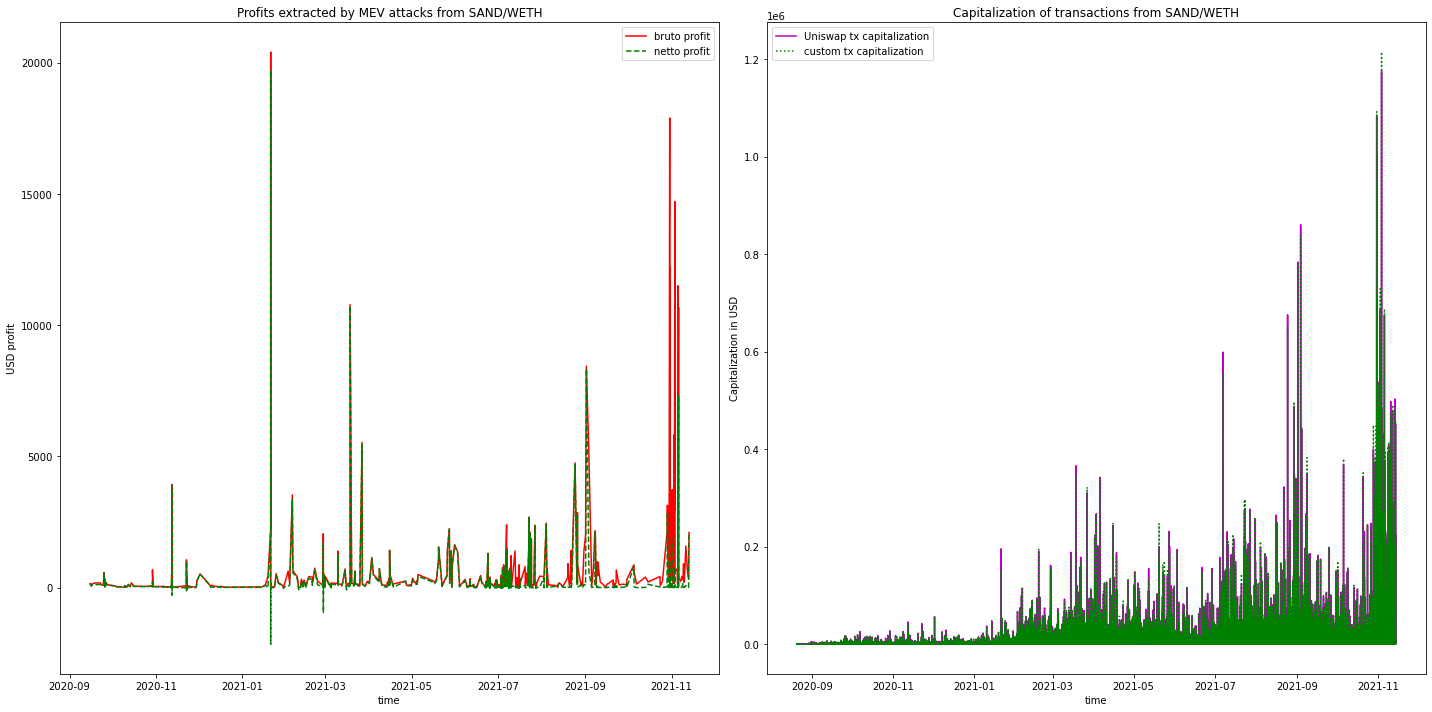

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_sand_weth_profits_df['timestamp'],
         grouped_sand_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_sand_weth_profits_df['timestamp'],
         grouped_sand_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from SAND/WETH')
ax1.legend()

ax2.plot(sand_weth_swaps_df['timestamp'],
         sand_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(sand_weth_swaps_df['timestamp'],
         sand_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from SAND/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## ALICE/WETH

In [98]:
alice_weth_filtered_swaps_df, alice_weth_mevs_df = alice_weth_sim.extract_filtered_and_mevs_dfs()
alice_weth_mevs_df

initial len = 8431, filtered len = 8099
txds = 332
out values = 166


token_in token_out   amount_in  amount_out   amount_usd  \
23      ALICE      WETH  678.023966    5.170192  8144.013616   
24       WETH     ALICE    5.005486  678.023966  8206.880595   
260     ALICE      WETH  147.470989    1.278424  2329.634880   
261      WETH     ALICE    1.236314  147.470989  2252.898059   
266     ALICE      WETH  149.223306    1.309591  2385.424984   
...       ...       ...         ...         ...          ...   
8223    ALICE      WETH  147.841749    0.875745  3601.556830   
8362     WETH     ALICE    1.549800  238.961240  6529.306338   
8363    ALICE      WETH  238.961240    1.617275  6813.576611   
8420     WETH     ALICE    0.591637   98.144312  2540.077182   
8422    ALICE      WETH   98.144312    0.617938  2652.999408   

               timestamp                                      sender  \
23   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
24   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
260  2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
261  2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
266  2021-03-31 05:08:04  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
...                  ...                                         ...   
8223 2021-11-23 07:58:19  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8362 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8363 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8420 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8422 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                              to  \
23    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
24    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
260   0x6201b699d16cc005427d66599767e9d7e7fc12d9   
261   0xf6da21e95d74767009accb145b96897ac3630bad   
266   0x6201b699d16cc005427d66599767e9d7e7fc12d9   
...                                          ...   
8223  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8362  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8363  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8420  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
8422  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                    txd  
23    0x716befcc5d23a5a8979ea44769baf18f7723f66f7c7c...  
24    0xcebbd38ba925c4de6acc61c7bc4766ed334250ccbf82...  
260   0x5d2e322cfa2cda5035222f0a8257012b5fa791712651...  
261   0x78cb2fed966c84fc2dbb89e8a598bccf4103459b878a...  
266   0xc5c1afa1a377e58796724c12d7272325a4ec26f6b264...  
...                                                 ...  
8223  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  
8362  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  
8363  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  
8420  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  
8422  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  

[332 rows x 9 columns]

In [99]:
alice_weth_mevs_df = alice_weth_sim.calculate_attack_profit(alice_weth_mevs_df)
alice_weth_mevs_df = alice_weth_sim.calculate_attack_profit_by_token(alice_weth_mevs_df)

In [100]:
alice_price_df = alice_weth_sim.get_daily_token_price(first_to_second=False, token_name='ALICE')
alice_price_df['date'] = alice_price_df['date'].dt.strftime("%Y-%m-%d")
alice_price_df

date  ALICE_price
0    2021-03-15     0.016933
1    2021-03-16     0.010279
2    2021-03-17     0.009842
3    2021-03-22     0.008325
4    2021-03-23     0.006360
..          ...          ...
246  2021-11-21     0.004264
247  2021-11-22     0.004784
248  2021-11-23     0.005554
249  2021-11-24     0.006316
250  2021-11-25     0.006559

[251 rows x 2 columns]

In [101]:
alice_weth_mevs_df['date'] = alice_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
alice_weth_mevs_df = pd.merge(alice_weth_mevs_df, alice_price_df, on='date', how='left')
alice_weth_mevs_df = pd.merge(alice_weth_mevs_df, weth_price_df, on='date', how='left')
alice_weth_mevs_df = pd.merge(alice_weth_mevs_df, nft_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [102]:
alice_weth_mevs_df['bruto_alice_to_usdc_profit'] = (alice_weth_mevs_df['ALICE_profit'] * alice_weth_mevs_df['ALICE_price'] *
                                                  alice_weth_mevs_df['WETH_price'])
alice_weth_mevs_df['bruto_total_profit'] = alice_weth_mevs_df['bruto_alice_to_usdc_profit'] + (alice_weth_mevs_df['WETH_profit'] *
                                                                                            alice_weth_mevs_df['WETH_price'])
alice_weth_mevs_df.loc[alice_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = alice_weth_mevs_df['tx_fee'].median()
alice_weth_mevs_df.loc[alice_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = alice_weth_mevs_df['tx_fee'].median()
alice_weth_mevs_df['gas_costs_usd'] = (alice_weth_mevs_df['tx_fee'] * alice_weth_mevs_df['WETH_price'] *
                                      alice_weth_mevs_df['gas_usage_by_tx'])
alice_weth_mevs_df['netto_profit'] = alice_weth_mevs_df['bruto_total_profit'] - alice_weth_mevs_df['gas_costs_usd']
alice_weth_mevs_df.dropna(inplace=True)
alice_weth_mevs_df

token_in token_out   amount_in  amount_out   amount_usd  \
0      ALICE      WETH  678.023966    5.170192  8144.013616   
1       WETH     ALICE    5.005486  678.023966  8206.880595   
2      ALICE      WETH  147.470989    1.278424  2329.634880   
3       WETH     ALICE    1.236314  147.470989  2252.898059   
4      ALICE      WETH  149.223306    1.309591  2385.424984   
..       ...       ...         ...         ...          ...   
327    ALICE      WETH  147.841749    0.875745  3601.556830   
328     WETH     ALICE    1.549800  238.961240  6529.306338   
329    ALICE      WETH  238.961240    1.617275  6813.576611   
330     WETH     ALICE    0.591637   98.144312  2540.077182   
331    ALICE      WETH   98.144312    0.617938  2652.999408   

              timestamp                                      sender  \
0   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
1   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
2   2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
3   2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
4   2021-03-31 05:08:04  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
..                  ...                                         ...   
327 2021-11-23 07:58:19  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                             to  \
0    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
1    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
2    0x6201b699d16cc005427d66599767e9d7e7fc12d9   
3    0xf6da21e95d74767009accb145b96897ac3630bad   
4    0x6201b699d16cc005427d66599767e9d7e7fc12d9   
..                                          ...   
327  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                   txd      profit  ...  \
0    0x716befcc5d23a5a8979ea44769baf18f7723f66f7c7c...   62.866979  ...   
1    0xcebbd38ba925c4de6acc61c7bc4766ed334250ccbf82...   62.866979  ...   
2    0x5d2e322cfa2cda5035222f0a8257012b5fa791712651...   76.736822  ...   
3    0x78cb2fed966c84fc2dbb89e8a598bccf4103459b878a...   76.736822  ...   
4    0xc5c1afa1a377e58796724c12d7272325a4ec26f6b264...   76.326581  ...   
..                                                 ...         ...  ...   
327  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  122.328275  ...   
328  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  284.270273  ...   
329  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  284.270273  ...   
330  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  112.922226  ...   
331  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  112.922226  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0    1589.740963  12110177               2            88615     1588.34   
1    1589.740963  12110177               0           108210     1588.34   
2    1920.774247  12145127               6           101202     1919.08   
3    1920.774247  12145127               3           124827     1919.08   
4    1920.774247  12145155               6           101190     1919.08   
..           ...       ...             ...              ...         ...   
327  4347.572488  13669667               6            85522     4341.17   
328  4258.707179  13677996               2            86311     4271.96   
329  4258.707179  13677996               4            85522     4271.96   
330  4521.407800  13681482               5            86131     4523.80   
331  4521.407800  13681482               7            8

In [103]:
print(len(alice_weth_mevs_df))
alice_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(alice_weth_mevs_df))
alice_weth_mevs_df

332
332


token_in token_out   amount_in  amount_out   amount_usd  \
0      ALICE      WETH  678.023966    5.170192  8144.013616   
1       WETH     ALICE    5.005486  678.023966  8206.880595   
2      ALICE      WETH  147.470989    1.278424  2329.634880   
3       WETH     ALICE    1.236314  147.470989  2252.898059   
4      ALICE      WETH  149.223306    1.309591  2385.424984   
..       ...       ...         ...         ...          ...   
327    ALICE      WETH  147.841749    0.875745  3601.556830   
328     WETH     ALICE    1.549800  238.961240  6529.306338   
329    ALICE      WETH  238.961240    1.617275  6813.576611   
330     WETH     ALICE    0.591637   98.144312  2540.077182   
331    ALICE      WETH   98.144312    0.617938  2652.999408   

              timestamp                                      sender  \
0   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
1   2021-03-25 20:05:53  0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
2   2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
3   2021-03-31 05:01:22  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
4   2021-03-31 05:08:04  0x6201b699d16cc005427d66599767e9d7e7fc12d9   
..                  ...                                         ...   
327 2021-11-23 07:58:19  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                             to  \
0    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
1    0x86a53c9e32abd3677e38bd0b390f24dd080e6426   
2    0x6201b699d16cc005427d66599767e9d7e7fc12d9   
3    0xf6da21e95d74767009accb145b96897ac3630bad   
4    0x6201b699d16cc005427d66599767e9d7e7fc12d9   
..                                          ...   
327  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                   txd      profit  ...  \
0    0x716befcc5d23a5a8979ea44769baf18f7723f66f7c7c...   62.866979  ...   
1    0xcebbd38ba925c4de6acc61c7bc4766ed334250ccbf82...   62.866979  ...   
2    0x5d2e322cfa2cda5035222f0a8257012b5fa791712651...   76.736822  ...   
3    0x78cb2fed966c84fc2dbb89e8a598bccf4103459b878a...   76.736822  ...   
4    0xc5c1afa1a377e58796724c12d7272325a4ec26f6b264...   76.326581  ...   
..                                                 ...         ...  ...   
327  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  122.328275  ...   
328  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  284.270273  ...   
329  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  284.270273  ...   
330  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  112.922226  ...   
331  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  112.922226  ...   

      WETH_price     block  block_position  gas_usage_by_tx ether_price  \
0    1589.740963  12110177               2            88615     1588.34   
1    1589.740963  12110177               0           108210     1588.34   
2    1920.774247  12145127               6           101202     1919.08   
3    1920.774247  12145127               3           124827     1919.08   
4    1920.774247  12145155               6           101190     1919.08   
..           ...       ...             ...              ...         ...   
327  4347.572488  13669667               6            85522     4341.17   
328  4258.707179  13677996               2            86311     4271.96   
329  4258.707179  13677996               4            85522     4271.96   
330  4521.407800  13681482               5            86131     4523.80   
331  4521.407800  13681482               7            8

### Bigger alicewiches and profits

In [104]:
alice_weth_count_df = alice_weth_mevs_df.value_counts(subset=['timestamp'])
alice_weth_count_df[alice_weth_count_df.values > 2]

Series([], dtype: int64)

In [105]:
grouped_alice_weth_profits_df = alice_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_alice_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_alice_weth_profits_df['block'] = grouped_alice_weth_profits_df['block'] / 2
grouped_alice_weth_profits_df['bruto_total_profit'] = grouped_alice_weth_profits_df['bruto_total_profit']/2
grouped_alice_weth_profits_df['netto_profit'] = (grouped_alice_weth_profits_df['bruto_total_profit'] -
                                               grouped_alice_weth_profits_df['gas_costs_usd'])
grouped_alice_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_alice_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_alice_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_alice_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_alice_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(alice_weth_mevs_df[alice_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(alice_weth_mevs_df[alice_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 3116.6150537466992
min brutto profit 3.0517278468259326
max netto profit 1035.0033846372407
min netto profit -2.890372312775634
zero bruto profit transactions = 0
transactions with losses = 1


In [106]:
print(fr"sum of paid gas = {sum(alice_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(alice_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(alice_weth_mevs_df['bruto_total_profit'] / 2) - sum(alice_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 19054.33678025382
sum of brutto profits = 29887.575780530948
sum of netto profits = 10833.239000277128


### Brutto profit to Uniswap capitalization coefficient

In [107]:
print("brutto attacks profits (" + str(sum(alice_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to alice/WETH Uniswap capitalization (" + str(alice_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(alice_weth_mevs_df['bruto_total_profit'] / 2) / alice_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (29887.575780530948) to alice/WETH Uniswap capitalization (27268151.30585331) coef is equal to 0.0010960616818242225


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [108]:
alice_weth_swaps_df = alice_weth_sim.calculate_attack_profit_by_token(alice_weth_swaps_df)
alice_weth_swaps_df

token_in token_out  amount_in  amount_out   amount_usd  \
0       ALICE      WETH  12.839028    0.174107   284.992234   
1       ALICE      WETH   2.000000    0.021126    36.733660   
2       ALICE      WETH  14.224945    0.120341   224.296642   
3        WETH     ALICE   0.187000   20.060961   329.448128   
4       ALICE      WETH  10.000000    0.105862   169.483118   
...       ...       ...        ...         ...          ...   
8426     WETH     ALICE   1.750000  268.673810  7479.967587   
8427     WETH     ALICE   0.294813   44.502987  1261.938032   
8428     WETH     ALICE   0.024781    3.731008   106.386760   
8429    ALICE      WETH  35.953357    0.236957  1016.785322   
8430    ALICE      WETH  54.063900    0.354587  1520.258064   

               timestamp                                      sender  \
0    2021-03-16 08:37:32  0x0000000000c9b1dde987a6abe20a2af8d9e636d9   
1    2021-03-16 12:04:44  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2    2021-03-17 07:37:35  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
3    2021-03-17 11:36:13  0x11111112542d85b3ef69ae05771c2dccff4faa26   
4    2021-03-17 12:26:52  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                  ...                                         ...   
8426 2021-11-25 06:46:23  0x642bffb61457fefa2fdd57c13aa24a2eaf0e5eea   
8427 2021-11-25 07:17:09  0xe66b31678d6c16e9ebf358268a790b763c133750   
8428 2021-11-25 07:25:05  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
8429 2021-11-25 07:42:28  0x0000000000000eb4ec62758aae93400b3e5f7f18   
8430 2021-11-25 07:48:04  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                              to  \
0     0x0000000000c9b1dde987a6abe20a2af8d9e636d9   
1     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2     0xf5ef67632cd2256d939702a126fe2c047d0a07bf   
3     0xe8c423de4fa5e56537517944a77ff94cee6fb8e2   
4     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                                          ...   
8426  0xdd75cd55c1367b3d2d928c6181eea46999d24a72   
8427  0x0225ca88e84784211297e6bfaecdf737842dec2e   
8428  0x74de5d4fcbf63e00296fd95d33236b9794016631   
8429  0x55d5c232d921b9eaa6b37b5845e439acd04b4dba   
8430  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                    txd  first_token_value  \
0     0x2cdf6512b85e1c20f548ba8c318846a1dd8dd2917ebd...          12.839028   
1     0x73191438977d7ff2d8acb9df6bc49cac321949ab4c6e...           2.000000   
2     0x272eaf073e8ea7d7b2cc263db9b05ae91684866d64fa...          14.224945   
3     0x8301c0fd62a4f98a3306837835556300874eefc6e7ce...          20.060961   
4     0x3eac79213f0d93f912851dfa46fafc82469eda6ac4b1...          10.000000   
...                                                 ...                ...   
8426  0x520703fd9962956401290da1be9f02836d0f1d059960...         268.673810   
8427  0xbe0ec899a9286f086e146d2eecb6a6122d105a059ee9...          44.502987   
8428  0xa074507c9ec72aa1d0f716b6482d76e49330777f4e62...           3.731008   
8429  0x68828c86b4d30c037e241338f958bf494a227b7b725a...          35.953357   
8430  0x9d9c50b6ca96eea11f9e1bd0feefaf5a4caa4c0a8df8...          54.063900   

      second_token_value  ALICE_profit  WETH_profit  
0               0.174107           0.0          0.0  
1               0.021126           0.0          0.0  
2               0.120341           0.0          0.0  
3               0.187000           0.0          0.0  
4               0.105862           0.0          0.0  
...                  ...           ...          ...  
8426            1.750000           0.0          0.0  
8427            0.294813           0.0          0.0  
8428            0.024781           0.0          0.0  
8429            0.236957           0.0          0.0  
8430            0.354587           0.0          0.0  

[8431 rows x 13 columns]

In [109]:
alice_price_df = alice_weth_sim.get_daily_token_price(first_to_second=False, token_name='ALICE')
alice_price_df['date'] = alice_price_df['date'].dt.strftime("%Y-%m-%d")
alice_price_df

date  ALICE_price
0    2021-03-15     0.016933
1    2021-03-16     0.010279
2    2021-03-17     0.009842
3    2021-03-22     0.008325
4    2021-03-23     0.006360
..          ...          ...
246  2021-11-21     0.004264
247  2021-11-22     0.004784
248  2021-11-23     0.005554
249  2021-11-24     0.006316
250  2021-11-25     0.006559

[251 rows x 2 columns]

In [110]:
alice_weth_swaps_df

token_in token_out  amount_in  amount_out   amount_usd  \
0       ALICE      WETH  12.839028    0.174107   284.992234   
1       ALICE      WETH   2.000000    0.021126    36.733660   
2       ALICE      WETH  14.224945    0.120341   224.296642   
3        WETH     ALICE   0.187000   20.060961   329.448128   
4       ALICE      WETH  10.000000    0.105862   169.483118   
...       ...       ...        ...         ...          ...   
8426     WETH     ALICE   1.750000  268.673810  7479.967587   
8427     WETH     ALICE   0.294813   44.502987  1261.938032   
8428     WETH     ALICE   0.024781    3.731008   106.386760   
8429    ALICE      WETH  35.953357    0.236957  1016.785322   
8430    ALICE      WETH  54.063900    0.354587  1520.258064   

               timestamp                                      sender  \
0    2021-03-16 08:37:32  0x0000000000c9b1dde987a6abe20a2af8d9e636d9   
1    2021-03-16 12:04:44  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2    2021-03-17 07:37:35  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
3    2021-03-17 11:36:13  0x11111112542d85b3ef69ae05771c2dccff4faa26   
4    2021-03-17 12:26:52  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                  ...                                         ...   
8426 2021-11-25 06:46:23  0x642bffb61457fefa2fdd57c13aa24a2eaf0e5eea   
8427 2021-11-25 07:17:09  0xe66b31678d6c16e9ebf358268a790b763c133750   
8428 2021-11-25 07:25:05  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
8429 2021-11-25 07:42:28  0x0000000000000eb4ec62758aae93400b3e5f7f18   
8430 2021-11-25 07:48:04  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                              to  \
0     0x0000000000c9b1dde987a6abe20a2af8d9e636d9   
1     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2     0xf5ef67632cd2256d939702a126fe2c047d0a07bf   
3     0xe8c423de4fa5e56537517944a77ff94cee6fb8e2   
4     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                                          ...   
8426  0xdd75cd55c1367b3d2d928c6181eea46999d24a72   
8427  0x0225ca88e84784211297e6bfaecdf737842dec2e   
8428  0x74de5d4fcbf63e00296fd95d33236b9794016631   
8429  0x55d5c232d921b9eaa6b37b5845e439acd04b4dba   
8430  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                    txd  first_token_value  \
0     0x2cdf6512b85e1c20f548ba8c318846a1dd8dd2917ebd...          12.839028   
1     0x73191438977d7ff2d8acb9df6bc49cac321949ab4c6e...           2.000000   
2     0x272eaf073e8ea7d7b2cc263db9b05ae91684866d64fa...          14.224945   
3     0x8301c0fd62a4f98a3306837835556300874eefc6e7ce...          20.060961   
4     0x3eac79213f0d93f912851dfa46fafc82469eda6ac4b1...          10.000000   
...                                                 ...                ...   
8426  0x520703fd9962956401290da1be9f02836d0f1d059960...         268.673810   
8427  0xbe0ec899a9286f086e146d2eecb6a6122d105a059ee9...          44.502987   
8428  0xa074507c9ec72aa1d0f716b6482d76e49330777f4e62...           3.731008   
8429  0x68828c86b4d30c037e241338f958bf494a227b7b725a...          35.953357   
8430  0x9d9c50b6ca96eea11f9e1bd0feefaf5a4caa4c0a8df8...          54.063900   

      second_token_value  ALICE_profit  WETH_profit  
0               0.174107           0.0          0.0  
1               0.021126           0.0          0.0  
2               0.120341           0.0          0.0  
3               0.187000           0.0          0.0  
4               0.105862           0.0          0.0  
...                  ...           ...          ...  
8426            1.750000           0.0          0.0  
8427            0.294813           0.0          0.0  
8428            0.024781           0.0          0.0  
8429            0.236957           0.0          0.0  
8430            0.354587           0.0          0.0  

[8431 rows x 13 columns]

In [111]:
alice_weth_swaps_df['date'] = alice_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
alice_weth_swaps_df = pd.merge(alice_weth_swaps_df, alice_price_df, on='date', how='left')
alice_weth_swaps_df = pd.merge(alice_weth_swaps_df, weth_price_df, on='date', how='left')
alice_weth_swaps_df['cap_alice_to_usdc'] = (alice_weth_swaps_df['first_token_value'] * alice_weth_swaps_df['ALICE_price'] *
                                          alice_weth_swaps_df['WETH_price'])
alice_weth_swaps_df['total_cap'] = alice_weth_swaps_df['cap_alice_to_usdc'] + (alice_weth_swaps_df['second_token_value'] *
                                                                            alice_weth_swaps_df['WETH_price'])

In [112]:
print("brutto attacks profits (" + str(sum(alice_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to ALICE/WETH custom capitalization (" + str(alice_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(alice_weth_mevs_df['bruto_total_profit'] / 2) / alice_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (29887.575780530948) to ALICE/WETH custom capitalization (27271529.31138581) coef is equal to 0.0002739814793596205


### Netto profit to Uniswap capitalization coefficient

In [113]:
print("netto attacks profits (" + str(sum(alice_weth_mevs_df['netto_profit'] / 2)) +
      ") to ALICE/WETH Uniswap capitalization (" + str(alice_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(alice_weth_mevs_df['netto_profit'] / 2) / alice_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (20360.407390404045) to ALICE/WETH Uniswap capitalization (27268151.30585331) coef is equal to 0.0007466735519409243


### Netto profit to custom capitalization coefficient

In [114]:
print("netto attacks profits (" + str(sum(alice_weth_mevs_df['netto_profit'] / 2)) +
      ") to ALICE/WETH custom capitalization (" + str(alice_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(alice_weth_mevs_df['netto_profit'] / 2) / alice_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (20360.407390404045) to ALICE/WETH custom capitalization (27271529.31138581) coef is equal to 0.00018664526618519716


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [115]:
print("ALICE/WETH pool contains " + str(len(alice_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(alice_weth_mevs_df)) + " MEV transactions) out of " + str(len(alice_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(alice_weth_mevs_df) / 2) / len(alice_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(alice_weth_mevs_df) / len(alice_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(alice_weth_mevs_df['amount_usd'].sum() / alice_weth_swaps_df['amount_usd'].sum()))

ALICE/WETH pool contains 166.0 MEV attacks (or 332 MEV transactions) out of 8431 total transactions.
Coefficient of MEV attacks = 0.019689242082789705; coefficient of MEV transactions = 0.03937848416557941
Coef of MEV attacks cap = 0.07160067169013895


### Distributions of profits and capitalizations

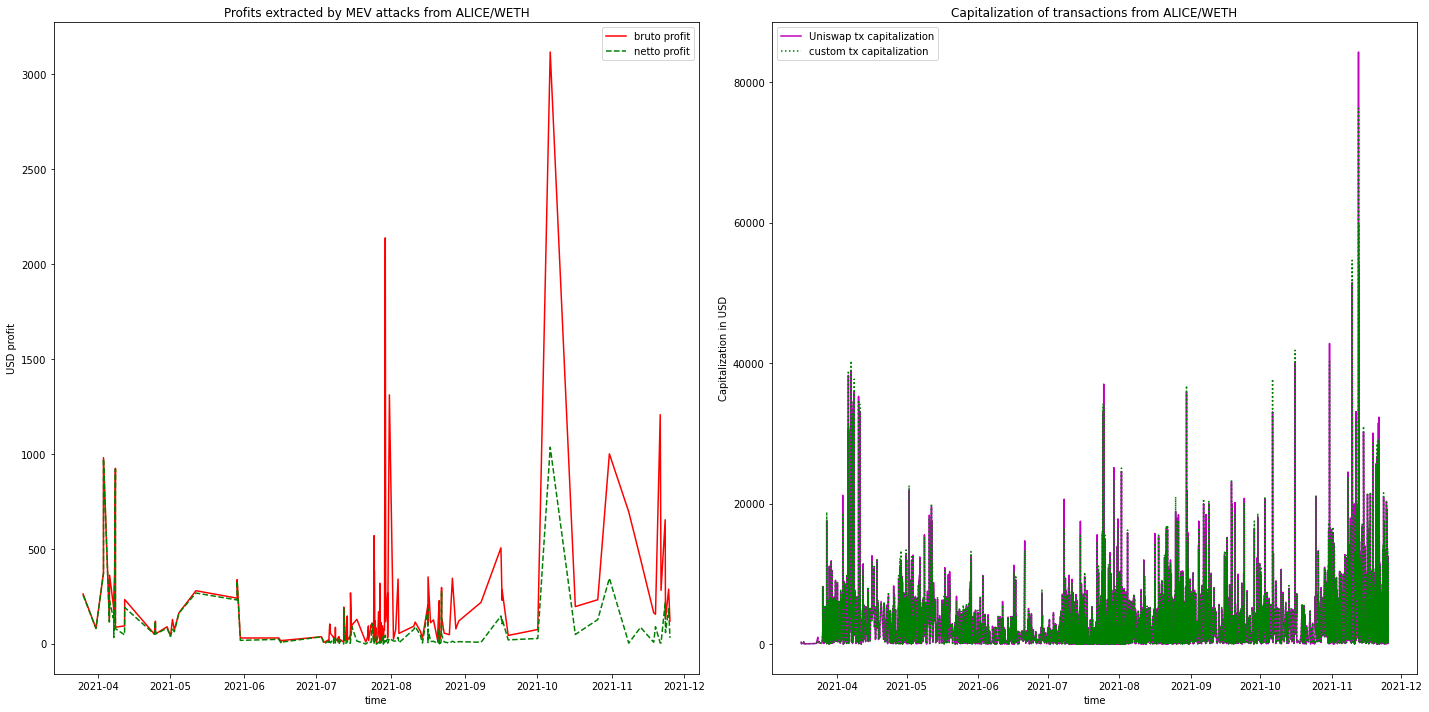

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_alice_weth_profits_df['timestamp'],
         grouped_alice_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_alice_weth_profits_df['timestamp'],
         grouped_alice_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from ALICE/WETH')
ax1.legend()

ax2.plot(alice_weth_swaps_df['timestamp'],
         alice_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(alice_weth_swaps_df['timestamp'],
         alice_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from ALICE/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

# Collecting all MEVs into one big history

In [117]:
nft_pools_swaps_list = [axs_weth_swaps_df, mana_weth_swaps_df, enj_weth_swaps_df,
                        sand_weth_swaps_df, alice_weth_swaps_df]
nft_pools_swaps_df = pd.concat(nft_pools_swaps_list)
nft_pools_swaps_df

token_in token_out  amount_in  amount_out   amount_usd  \
0        WETH       AXS   1.000000  271.895117  3265.028270   
1        WETH       AXS   0.400000   87.762331  1238.364115   
2        WETH       AXS   0.190000    0.048255   572.499245   
3        WETH       AXS   0.010000    0.002537    30.131539   
4        WETH       AXS   0.300000   59.387987   921.135675   
...       ...       ...        ...         ...          ...   
8426     WETH     ALICE   1.750000  268.673810  7479.967587   
8427     WETH     ALICE   0.294813   44.502987  1261.938032   
8428     WETH     ALICE   0.024781    3.731008   106.386760   
8429    ALICE      WETH  35.953357    0.236957  1016.785322   
8430    ALICE      WETH  54.063900    0.354587  1520.258064   

               timestamp                                      sender  \
0    2021-05-03 01:42:22  0x27f9adb26d532a41d97e00206114e429ad58c679   
1    2021-05-03 01:42:28  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
2    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
3    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
4    2021-05-03 01:42:48  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                  ...                                         ...   
8426 2021-11-25 06:46:23  0x642bffb61457fefa2fdd57c13aa24a2eaf0e5eea   
8427 2021-11-25 07:17:09  0xe66b31678d6c16e9ebf358268a790b763c133750   
8428 2021-11-25 07:25:05  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
8429 2021-11-25 07:42:28  0x0000000000000eb4ec62758aae93400b3e5f7f18   
8430 2021-11-25 07:48:04  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                              to  \
0     0x27f9adb26d532a41d97e00206114e429ad58c679   
1     0x9108048f5ef19c64d00adda718906990b53d02cd   
2     0xa097e13bef6a6985008924af02f3afdb8814391d   
3     0xc496d84215d5018f6f53e7f6f12e45c9b5e8e8a9   
4     0xbf5d676f2d3c1a5abd27c4b11a95541d79575d5d   
...                                          ...   
8426  0xdd75cd55c1367b3d2d928c6181eea46999d24a72   
8427  0x0225ca88e84784211297e6bfaecdf737842dec2e   
8428  0x74de5d4fcbf63e00296fd95d33236b9794016631   
8429  0x55d5c232d921b9eaa6b37b5845e439acd04b4dba   
8430  0xe66b31678d6c16e9ebf358268a790b763c133750   

                                                    txd  first_token_value  \
0     0x4bd0e1ac628e46befe15c93c7f5125146dbcb3d39dec...         271.895117   
1     0x0439383f710521f46e1af7355efc9462c0b002dec9c5...          87.762331   
2     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.048255   
3     0x25d4e2eb74505fdecf75fcb7bb872f5c00d81e3fcf7c...           0.002537   
4     0x51b79e91294e4b3a894d8b2fc239a6a01dbde7b92734...          59.387987   
...                                                 ...                ...   
8426  0x520703fd9962956401290da1be9f02836d0f1d059960...         268.673810   
8427  0xbe0ec899a9286f086e146d2eecb6a6122d105a059ee9...          44.502987   
8428  0xa074507c9ec72aa1d0f716b6482d76e49330777f4e62...           3.731008   
8429  0x68828c86b4d30c037e241338f958bf494a227b7b725a...          35.953357   
8430  0x9d9c50b6ca96eea11f9e1bd0feefaf5a4caa4c0a8df8...          54.063900   

      ...  cap_mana_to_usdc  ENJ_profit  ENJ_price cap_enj_to_usdc  \
0     ...               NaN         NaN        NaN             NaN   
1     ...               NaN         NaN        NaN             NaN   
2     ...               NaN         NaN        NaN             NaN   
3     ...               NaN         NaN        NaN             NaN   
4     ...               NaN         NaN        NaN             NaN   
...   ...               ...         ...        ...             ...   
8426  ...               NaN         NaN        NaN             NaN   
8427  ...               NaN         NaN        NaN             NaN   
8428  ...               NaN         NaN        NaN             NaN   
8429  ...               NaN         NaN        NaN             NaN   
8430  ...               NaN         NaN        NaN 

In [118]:
chosen_columns = ['timestamp', 'sender', 'amount_usd', 'to', 'txd', 'block', 'block_position', 'bruto_total_profit',
                  'tx_fee', 'gas_usage_by_tx', 'gas_costs_usd','netto_profit']

axs_weth_profits_df = axs_weth_mevs_df[chosen_columns]
mana_weth_profits_df = mana_weth_mevs_df[chosen_columns]
enj_weth_profits_df = enj_weth_mevs_df[chosen_columns]
sand_weth_profits_df = sand_weth_mevs_df[chosen_columns]
alice_weth_profits_df = alice_weth_mevs_df[chosen_columns]

axs_weth_profits_df['pool_name'] = 'AXS/WETH'
mana_weth_profits_df['pool_name'] = 'MANA/WETH'
enj_weth_profits_df['pool_name'] = 'ENJ/WETH'
sand_weth_profits_df['pool_name'] = 'SAND/WETH'
alice_weth_profits_df['pool_name'] = 'ALICE/WETH'

nft_profits_list = [axs_weth_profits_df, mana_weth_profits_df, enj_weth_profits_df,
                     sand_weth_profits_df, alice_weth_profits_df]
nft_profits_df = pd.concat(nft_profits_list)
nft_profits_df

<ipython-input-118-87a9c286369f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axs_weth_profits_df['pool_name'] = 'AXS/WETH'
<ipython-input-118-87a9c286369f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mana_weth_profits_df['pool_name'] = 'MANA/WETH'
<ipython-input-118-87a9c286369f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

timestamp                                      sender  \
0   2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
1   2021-05-03 01:42:48  0xd78a3280085ee846196cb5fab7d510b279486d44   
2   2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
3   2021-05-03 01:43:46  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
4   2021-05-03 01:46:13  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
..                  ...                                         ...   
327 2021-11-23 07:58:19  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

        amount_usd                                          to  \
0    312150.092977  0xf6da21e95d74767009accb145b96897ac3630bad   
1    602630.784000  0xf6da21e95d74767009accb145b96897ac3630bad   
2      5784.433126  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
3      4721.062730  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
4      2301.348308  0xda1faeb056a2f568b138ca0ad9ad8a51915ba336   
..             ...                                         ...   
327    3601.556830  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
328    6529.306338  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
329    6813.576611  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
330    2540.077182  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
331    2652.999408  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                   txd     block  \
0    0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...  12358321   
1    0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...  12358321   
2    0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...  12358324   
3    0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...  12358324   
4    0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...  12358334   
..                                                 ...       ...   
327  0xced6d47ff1353d827493273b896c61943a95d1ed5be4...  13669667   
328  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  13677996   
329  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  13677996   
330  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  13681482   
331  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  13681482   

     block_position  bruto_total_profit        tx_fee  gas_usage_by_tx  \
0                 6          539.671873  1.000000e-09            76180   
1                 3          539.671873  1.000000e-09           116312   
2                45           94.155426  4.000000e-08           127234   
3                47           94.155426  4.000000e-08            78879   
4                29          188.450122  3.300000e-08            78879   
..              ...                 ...           ...              ...   
327               6          129.318627  9.543208e-08            85522   
328               2          287.354391  1.396729e-07            86311   
329               4          287.354391  1.396729e-07            85522   
330               5          118.921719  1.138215e-07            86131   
331               7          118.921719  1.138215e-07            85542   

     gas_costs_usd  netto_profit   pool_name  
0         0.260880    539.410993    AXS/WETH  
1         0.398313    539.273560    AXS/WETH  
2        17.428644     76.726782    AXS/WETH  
3        10.804926     83.350500    AXS/WETH  
4         8.914064    179.536057    AXS/WETH  
..             ...           ...         ...  
327      35.482897     93.835730  ALICE/WETH  
328      51.340025    236.014366  ALICE/WETH  
329      50.870707    236.483684  ALICE/WETH  
330      44.325899     74.595820  ALICE/WETH  
331      44.022780     74.898939  ALICE/WETH  

[3292 rows x 13 columns]

In [119]:
nft_profits_df.sort_values(by=['timestamp'], inplace=True)
nft_profits_df = nft_profits_df.reset_index()
nft_profits_df.drop(columns=['index'])

timestamp                                      sender  \
0    2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1    2020-06-08 10:50:08  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
2    2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3    2020-06-21 01:48:01  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
4    2020-06-24 18:06:50  0xeca2e07abc83c78a7178c46b84962af86de342ff   
...                  ...                                         ...   
3287 2021-11-24 06:00:00  0x000000000035b5e5ad9019092c665357240f594e   
3288 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3289 2021-11-24 15:33:40  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3290 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3291 2021-11-25 04:45:37  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

        amount_usd                                          to  \
0       130.226365  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
1       129.676004  0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
2       103.673264  0xf164fc0ec4e93095b804a4795bbe1e041497b92a   
3       103.324412  0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62   
4       231.717919  0xeca2e07abc83c78a7178c46b84962af86de342ff   
...            ...                                         ...   
3287  25510.747133  0x000000000035b5e5ad9019092c665357240f594e   
3288   6529.306338  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3289   6813.576611  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3290   2540.077182  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
3291   2652.999408  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                                    txd     block  \
0     0x76e6f84c717415f830511897756521926b8a78679c71...  10224660   
1     0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...  10224660   
2     0x263039051ae2d90c7df6aac281f1cea72fd8cb884044...  10306250   
3     0xdc55cd0b06400b1145028d27ac0cb1444451f8637771...  10306250   
4     0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...  10330038   
...                                                 ...       ...   
3287  0xdcc052c9890348aef473bf3d5ddc805fb0982cf641ff...  13675530   
3288  0x22243996c14d15f33cb21b4026dd98e20ea0e84ffeab...  13677996   
3289  0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...  13677996   
3290  0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...  13681482   
3291  0xa5bff4226e4d8980557369ff4d6459dc78d0b1d3afc8...  13681482   

      block_position  bruto_total_profit        tx_fee  gas_usage_by_tx  \
0                188            0.822650  4.017321e-08            99040   
1                175            0.822650  4.017321e-08           125049   
2                162            0.512858  2.100000e-08            99838   
3                155            0.512858  2.100000e-08           125902   
4                  4            4.298381  7.250000e-08            99132   
...              ...                 ...           ...              ...   
3287               3           71.558871  8.565533e-08            87185   
3288               2          287.354391  1.396729e-07            86311   
3289               4          287.354391  1.396729e-07            85522   
3290               5          118.921719  1.138215e-07            86131   
3291               7          118.921719  1.138215e-07            85542   

      gas_costs_usd  netto_profit   pool_name  
0          0.978427     -0.155777    ENJ/WETH  
1          1.235373     -0.412722    ENJ/WETH  
2          0.478867      0.033990   MANA/WETH  
3          0.603882     -0.091024   MANA/WETH  
4          1.670445      2.627936    ENJ/WETH  
...             ...           ...         ...  
3287      31.803429     39.755442    ENJ/WETH  
3288      51.340025    236.014366  ALICE/WETH  
3289      50.870707    236.483684  ALICE/WETH  
3290      44.325899     74.595820  ALICE/WETH  
3291      44.022780     74.898939  ALICE/WETH  

[3292 rows x 13 columns]

In [120]:
grouped_nft_profits_df = nft_profits_df.value_counts(subset=['timestamp'])
grouped_nft_profits_df[grouped_nft_profits_df.values > 2]

timestamp          
2021-01-21 08:34:15    4
2021-07-12 19:22:55    4
2021-01-21 08:01:10    4
2020-09-27 05:30:02    4
2020-09-25 16:57:13    4
2021-01-21 08:06:54    4
2020-09-25 09:51:42    4
2020-11-09 01:40:38    4
2020-11-12 11:56:45    4
2021-01-21 08:09:22    4
2021-01-21 08:11:08    4
2021-05-02 01:38:38    4
2021-07-27 09:21:27    4
2021-01-21 08:47:46    4
2021-01-21 08:24:41    4
2021-01-21 08:38:57    4
2021-01-21 08:38:50    4
2020-11-30 06:04:25    4
2021-10-30 23:27:22    4
2021-01-21 08:30:00    4
2020-11-22 17:29:26    4
dtype: int64

In [121]:
grouped_by_timestamps_nft_profits_df = nft_profits_df.groupby(by=['timestamp']).sum()
grouped_by_timestamps_nft_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_by_timestamps_nft_profits_df['block'] = grouped_by_timestamps_nft_profits_df['block'] / 2
grouped_by_timestamps_nft_profits_df['bruto_total_profit']= (grouped_by_timestamps_nft_profits_df['bruto_total_profit'] /
                                                                  2)
grouped_by_timestamps_nft_profits_df['netto_profit'] = grouped_by_timestamps_nft_profits_df['bruto_total_profit'] - grouped_by_timestamps_nft_profits_df['gas_costs_usd']
grouped_by_timestamps_nft_profits_df.reset_index(inplace=True)
grouped_by_timestamps_nft_profits_df

timestamp  index    amount_usd       block  bruto_total_profit  \
0    2020-06-08 10:50:08      1    259.902368  10224660.0            0.822650   
1    2020-06-21 01:48:01      1    206.997676  10306250.0            0.512858   
2    2020-06-24 18:06:50      5    462.690431  10330038.0            4.298381   
3    2020-06-29 12:37:46      9    179.427732  10360783.0            1.286191   
4    2020-08-30 15:37:15     13   6961.604168  10763024.0           60.694117   
...                  ...    ...           ...         ...                 ...   
1620 2021-11-23 07:58:19    653   7080.785385  13669667.0          129.318627   
1621 2021-11-23 15:18:49   1577  19439.654857  13671604.0          141.058748   
1622 2021-11-24 06:00:00   1581  51093.153982  13675530.0           71.558871   
1623 2021-11-24 15:33:40    657  13342.882949  13677996.0          287.354391   
1624 2021-11-25 04:45:37    661   5193.076589  13681482.0          118.921719   

      gas_usage_by_tx  gas_costs_usd  netto_profit  
0              224089       2.213800     -1.391150  
1              225740       1.082749     -0.569891  
2              186728       2.790211      1.508170  
3              227237       2.572013     -1.285822  
4              264043      27.347875     33.346242  
...               ...            ...           ...  
1620           171621      71.205190     58.113437  
1621           165655     137.327783      3.730965  
1622           165679      70.891531      0.667339  
1623           171833     102.210732    185.143659  
1624           171673      88.348680     30.573039  

[1625 rows x 8 columns]

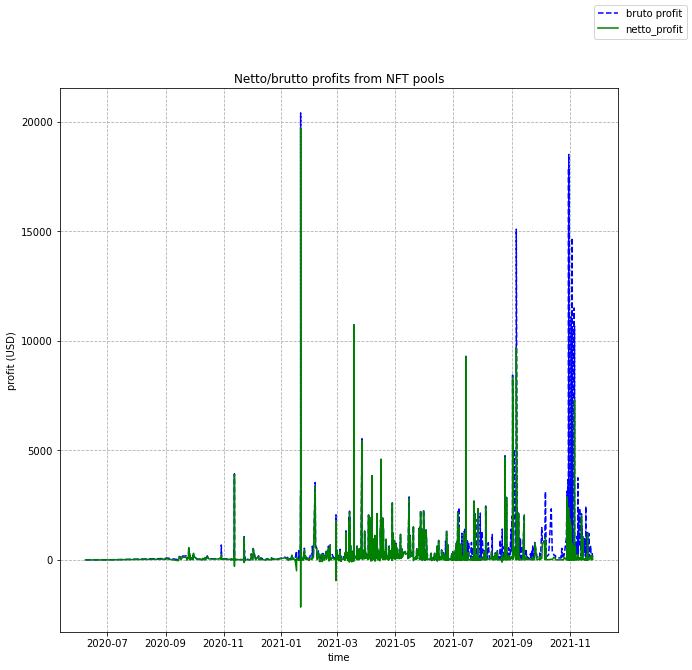

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(grouped_by_timestamps_nft_profits_df['timestamp'], grouped_by_timestamps_nft_profits_df['bruto_total_profit'],
        color='b', linestyle='--', label='bruto profit')
ax.plot(grouped_by_timestamps_nft_profits_df['timestamp'], grouped_by_timestamps_nft_profits_df['netto_profit'],
        label='netto_profit', color='g')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto/brutto profits from NFT pools')
fig.legend()
plt.show()

In [123]:
print(fr"total meme netto = {sum(grouped_by_timestamps_nft_profits_df['netto_profit'])}")
print(fr"total meme brutto = {sum(grouped_by_timestamps_nft_profits_df['bruto_total_profit'])}")
print(fr"total gas spendings in USD = {sum(grouped_by_timestamps_nft_profits_df['gas_costs_usd'])}")
print("capitalization of MEV attacks conform Uniswap is " + str(nft_profits_df['amount_usd'].sum()) +
      " and out of total nft pools capitalization is " + str(nft_pools_swaps_df['amount_usd'].sum()) +
      ", meaning that capitalization coefficient is " + str(nft_profits_df['amount_usd'].sum() / nft_pools_swaps_df['amount_usd'].sum()))
print("count of MEV transactions on nft pools is " + str(len(nft_profits_df)) +
      " and total meme pools transaction count equal to " + str(len(nft_pools_swaps_df)) +
      ", lead to frequency of MEV attacks to all transactions " + str(len(nft_profits_df) / len(nft_pools_swaps_df)))

total meme netto = 415813.21130442695
total meme brutto = 821833.038396883
total gas spendings in USD = 406019.8270924561
capitalization of MEV attacks conform Uniswap is 120943641.55661681 and out of total nft pools capitalization is 2278620748.708062, meaning that capitalization coefficient is 0.05307756528820767
count of MEV transactions on nft pools is 3292 and total meme pools transaction count equal to 289888, lead to frequency of MEV attacks to all transactions 0.011356109945910145


In [124]:
nft_profits_df.to_csv('nft_exact_mevs_profits_df.csv')
grouped_by_timestamps_nft_profits_df.to_csv('timestamp_grouped_nft_exact_mevs_profits_df.csv')